# My Evaluation

In [183]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
import pandas as pd ## pandas is used to manupulate the dataframe
import numpy as np ## numpy is used to do scientific calculations
import matplotlib.pyplot as plt ## matplotlib used for visualization
import seaborn as sns ## seaborn used for visualization 
import missingno as msno ## used to visualize missing values
import warnings ## used to remove warnings
warnings.filterwarnings('ignore')
%matplotlib inline

from sklearn.model_selection import train_test_split,cross_validate, GridSearchCV
from sklearn.preprocessing import StandardScaler,OrdinalEncoder
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression,Lasso,Ridge,BayesianRidge
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

import math
from IPython.display import Image
import warnings
warnings.filterwarnings("ignore")
sns.set(rc={"figure.figsize": (20, 15)})
sns.set_style("whitegrid")

In [184]:
df = pd.read_csv('input/train.csv')

In [185]:
df

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL        65.00     8450   Pave   NaN      Reg   
1        2          20       RL        80.00     9600   Pave   NaN      Reg   
2        3          60       RL        68.00    11250   Pave   NaN      IR1   
3        4          70       RL        60.00     9550   Pave   NaN      IR1   
4        5          60       RL        84.00    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL        62.00     7917   Pave   NaN      Reg   
1456  1457          20       RL        85.00    13175   Pave   NaN      Reg   
1457  1458          70       RL        66.00     9042   Pave   NaN      Reg   
1458  1459          20       RL        68.00     9717   Pave   NaN      Reg   
1459  1460          20       RL        75.00     9937   Pave   NaN      Reg   

     LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
0            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
2            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
3            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
4            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
...          ...       ...  ...      ...    ...    ...         ...     ...   
1455         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1456         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
1457         Lvl    AllPub  ...        0    NaN  GdPrv        Shed    2500   
1458         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1459         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   

     MoSold YrSold  SaleType  SaleCondition  SalePrice  
0         2   2008        WD         Normal     208500  
1         5   2007        WD         Normal     181500  
2         9   2008        WD         Normal     223500  
3         2   2006        WD        Abnorml     140000  
4        12   2008        WD         Normal     250000  
...     ...    ...       ...            ...        ...  
1455      8   2007        WD         Normal     175000  
1456      2   2010        WD         Normal     210000  
1457      5   2010        WD         Normal     266500  
1458      4   2010        WD         Normal     142125  
1459      6   2008        WD         Normal     147500  

[1460 rows x 81 columns]

In [186]:
df.head(10).style.background_gradient(cmap = 'viridis')

In [187]:
df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL        65.00     8450   Pave   NaN      Reg   
1   2          20       RL        80.00     9600   Pave   NaN      Reg   
2   3          60       RL        68.00    11250   Pave   NaN      IR1   
3   4          70       RL        60.00     9550   Pave   NaN      IR1   
4   5          60       RL        84.00    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [188]:
df.tail()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
1455  1456          60       RL        62.00     7917   Pave   NaN      Reg   
1456  1457          20       RL        85.00    13175   Pave   NaN      Reg   
1457  1458          70       RL        66.00     9042   Pave   NaN      Reg   
1458  1459          20       RL        68.00     9717   Pave   NaN      Reg   
1459  1460          20       RL        75.00     9937   Pave   NaN      Reg   

     LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
1455         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1456         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
1457         Lvl    AllPub  ...        0    NaN  GdPrv        Shed    2500   
1458         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1459         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   

     MoSold YrSold  SaleType  SaleCondition  SalePrice  
1455      8   2007        WD         Normal     175000  
1456      2   2010        WD         Normal     210000  
1457      5   2010        WD         Normal     266500  
1458      4   2010        WD         Normal     142125  
1459      6   2008        WD         Normal     147500  

[5 rows x 81 columns]

In [189]:
df.describe().transpose().style.background_gradient(cmap = 'magma')

In [190]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

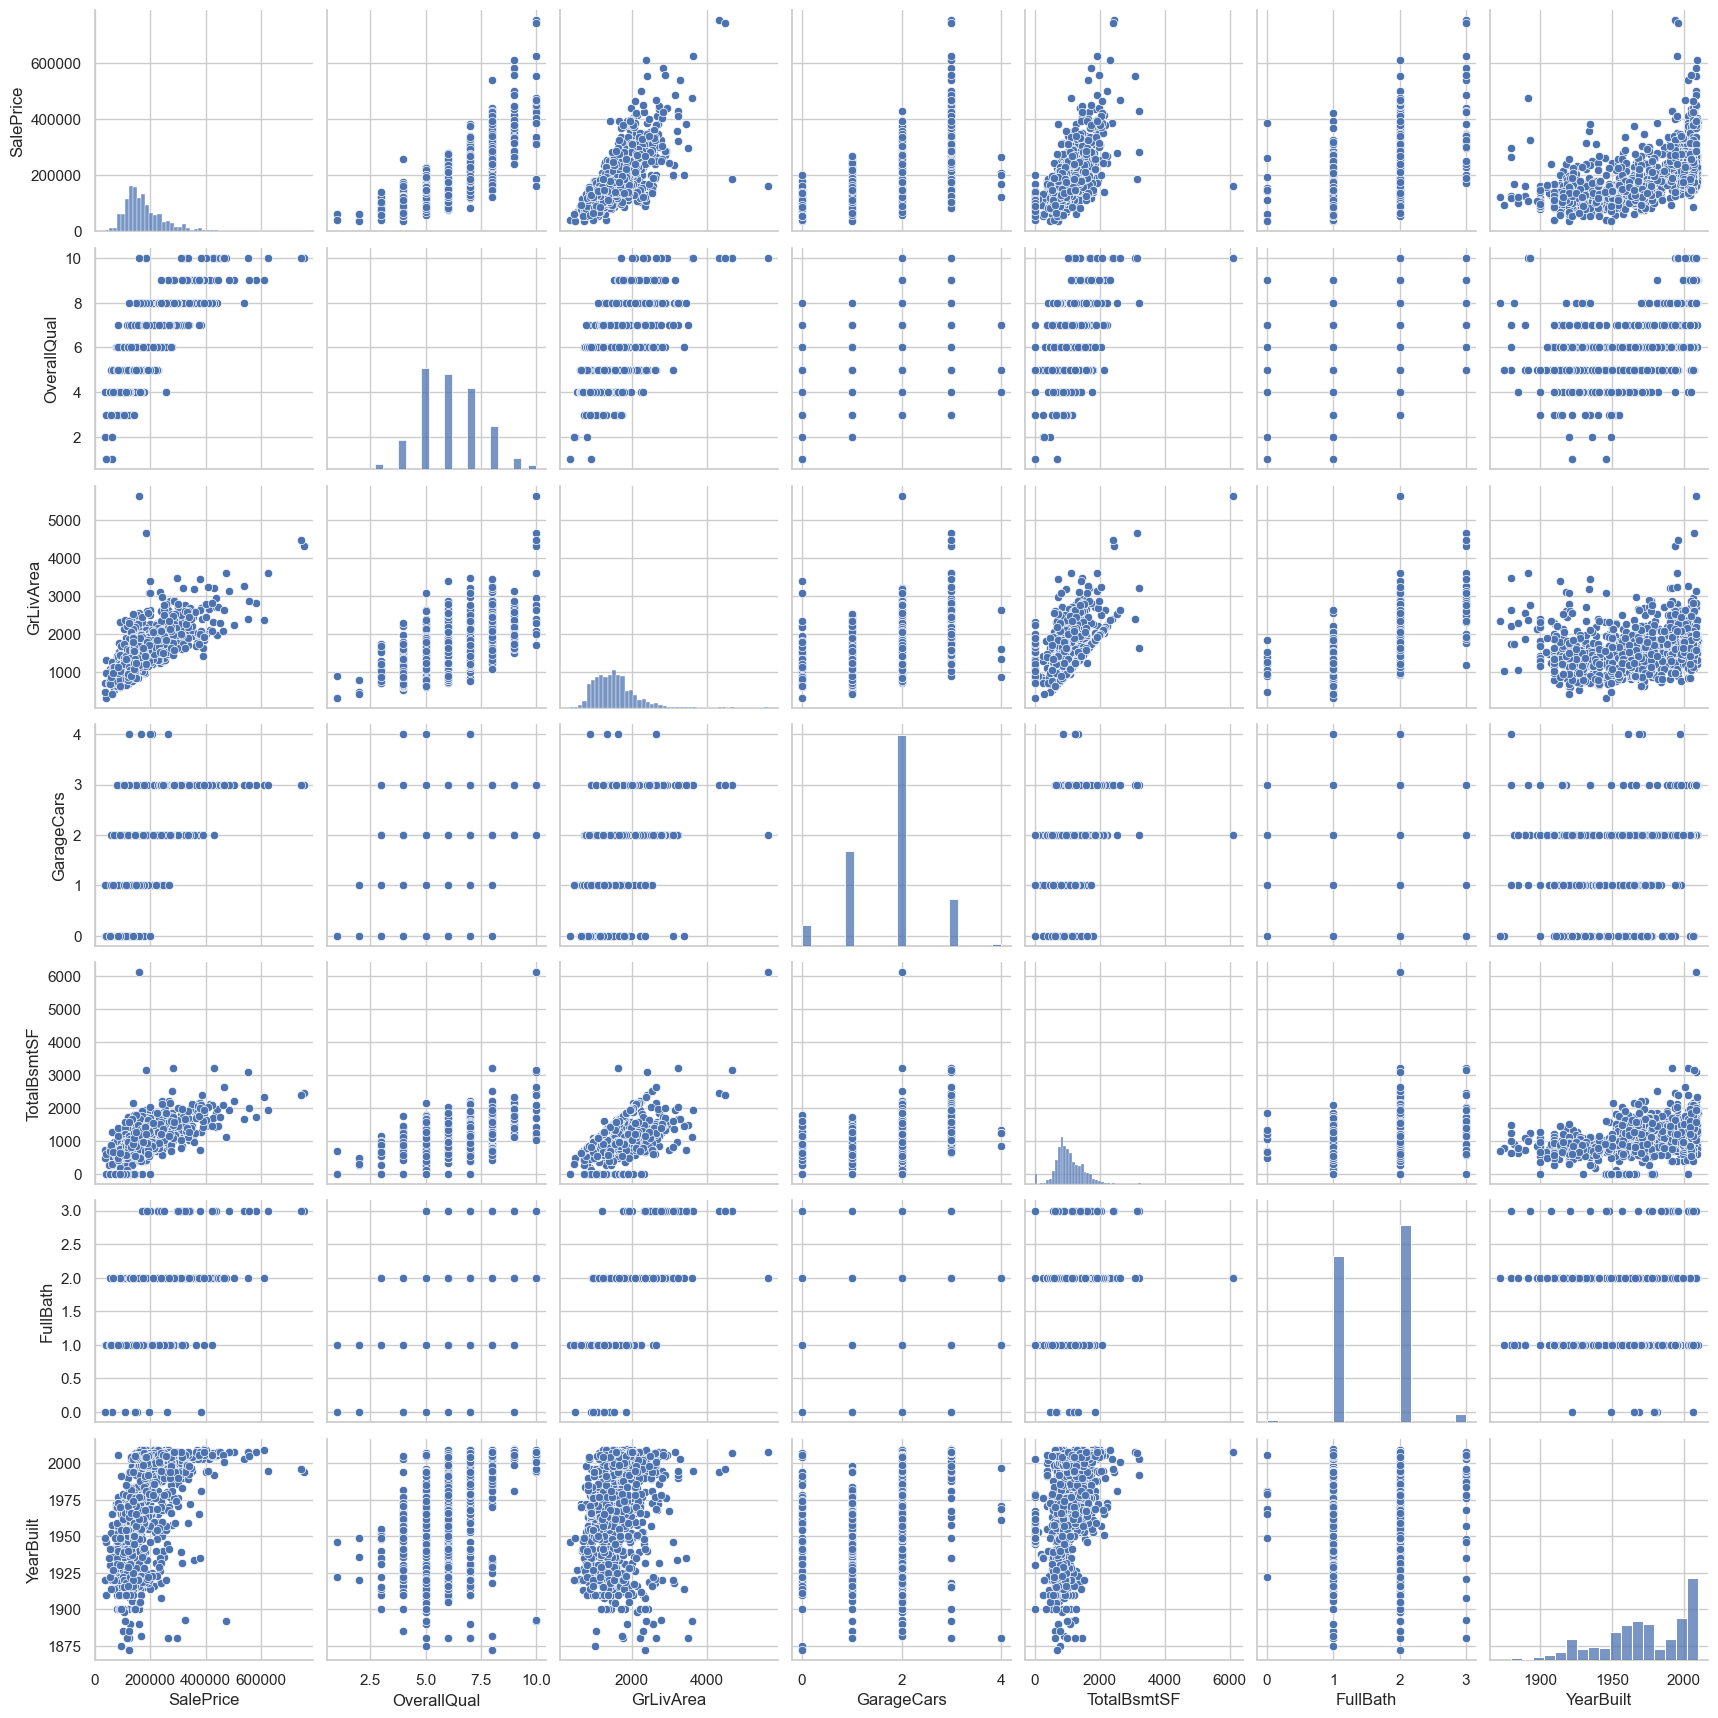

In [191]:
var_num = ["SalePrice", "OverallQual", "GrLivArea", "GarageCars", "TotalBsmtSF", "FullBath", "YearBuilt"]
sns.pairplot(df[var_num])

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

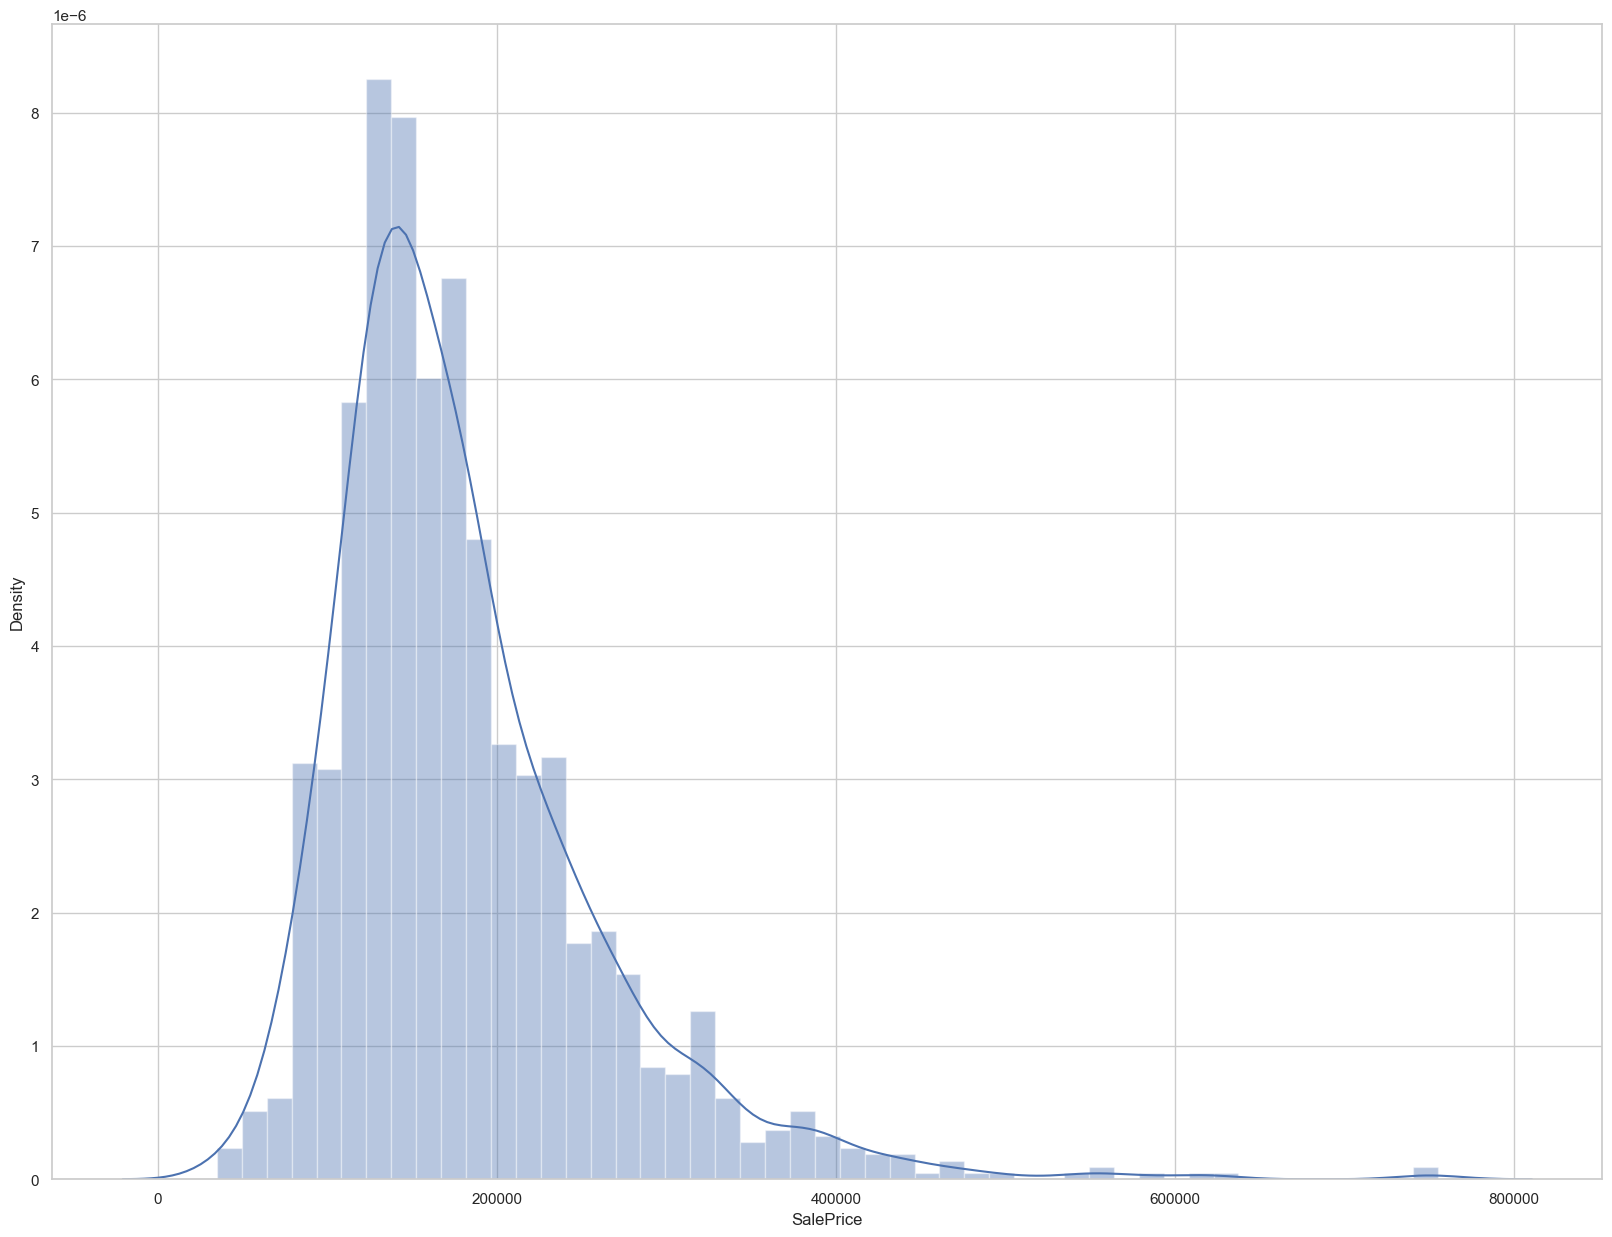

In [192]:
sns.distplot(df['SalePrice'])

In [193]:
df['SalePrice'].describe()

count     1,460.00
mean    180,921.20
std      79,442.50
min      34,900.00
25%     129,975.00
50%     163,000.00
75%     214,000.00
max     755,000.00
Name: SalePrice, dtype: float64

<AxesSubplot:xlabel='LogSalePrice', ylabel='Density'>

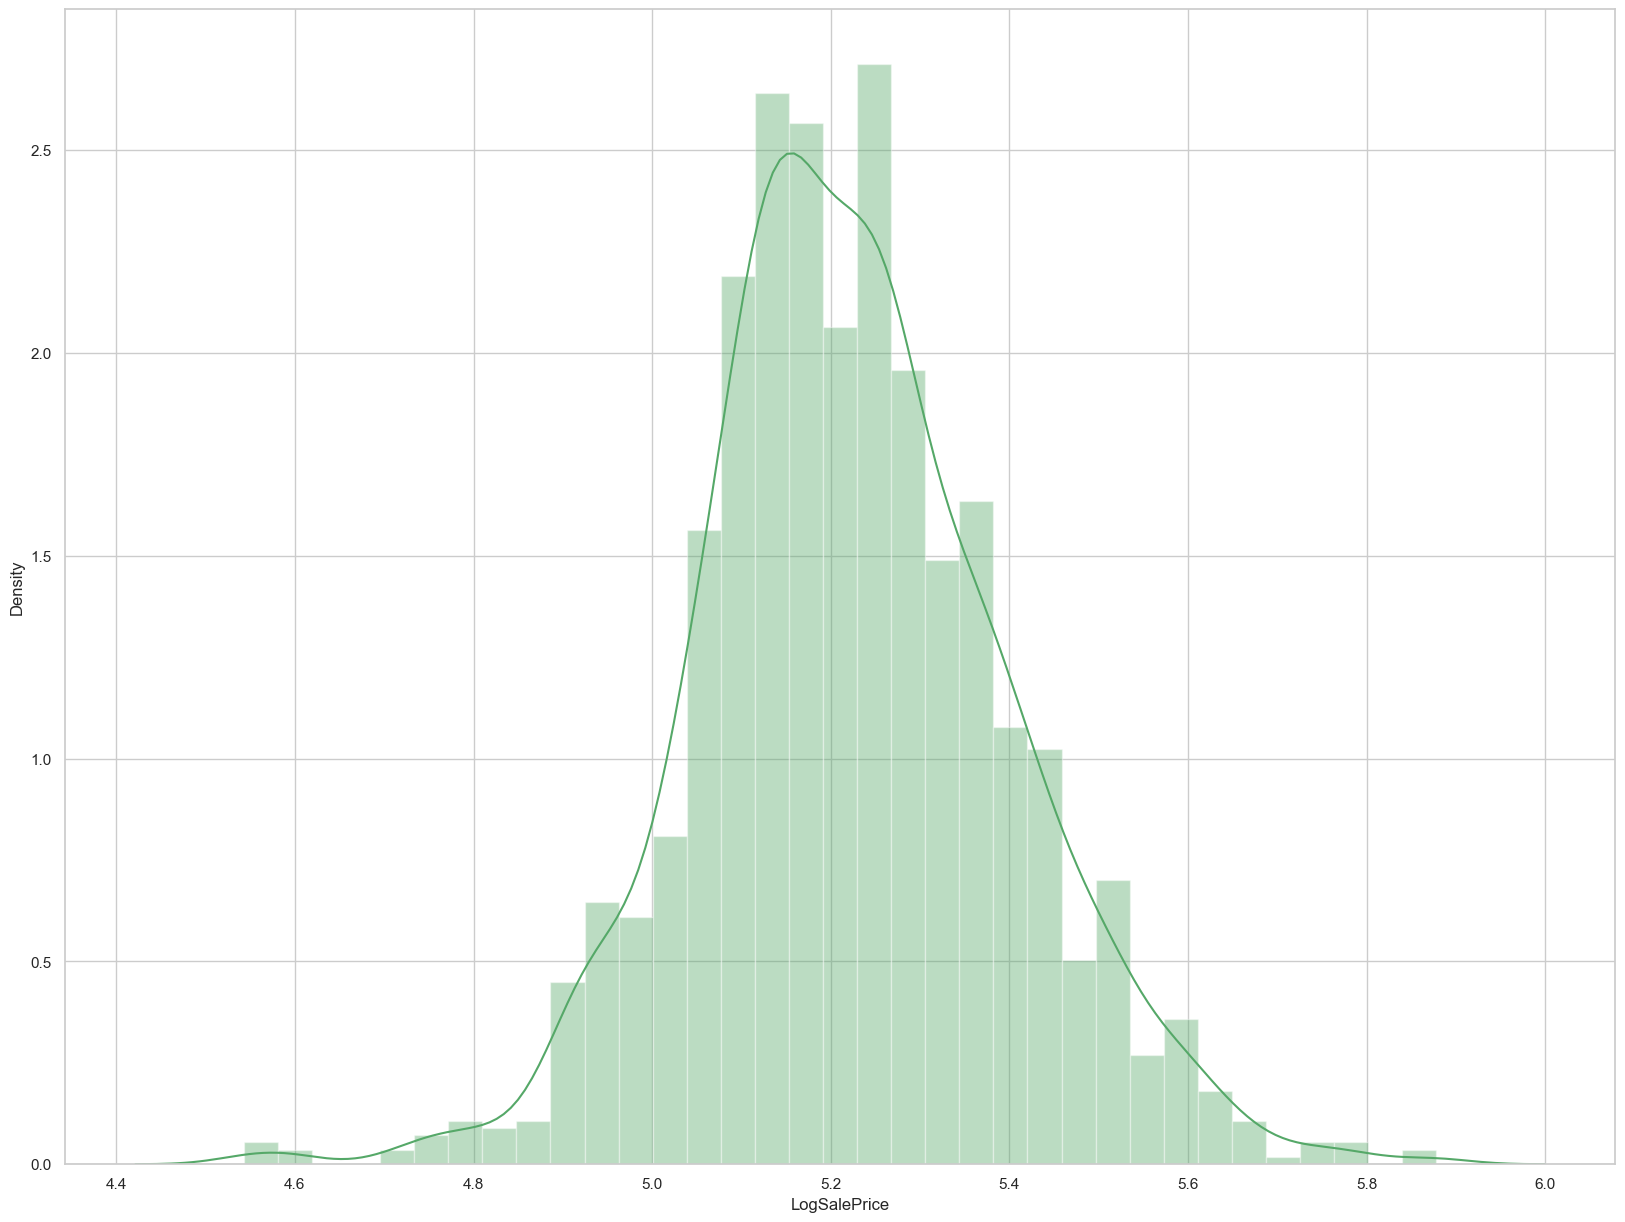

In [194]:
df['LogSalePrice'] = np.log10(df['SalePrice'])
sns.distplot(df['LogSalePrice'], color = 'g')

In [195]:
# No duplicated data
df.duplicated().sum()

0

In [196]:
pd.options.display.max_rows = None ## Shows all rows, needs to be resetted after
df.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [197]:
df.columns[df.isna().any()].tolist()

['LotFrontage',
 'Alley',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

In [198]:
#resetting the options for 'max_rows'
pd.reset_option('max_rows')

# Missing values handling

### Let's group and see each columns % of missing values

In [199]:
dfna = df[df.columns[df.isna().any()].tolist()]
a = dfna.isnull().sum()/len(df)*100
a.sort_values(ascending = False, inplace = True)
a

PoolQC         99.52
MiscFeature    96.30
Alley          93.77
Fence          80.75
FireplaceQu    47.26
LotFrontage    17.74
GarageType      5.55
GarageYrBlt     5.55
GarageFinish    5.55
GarageQual      5.55
GarageCond      5.55
BsmtExposure    2.60
BsmtFinType2    2.60
BsmtFinType1    2.53
BsmtCond        2.53
BsmtQual        2.53
MasVnrArea      0.55
MasVnrType      0.55
Electrical      0.07
dtype: float64

# Let's check, which column values are numeric, to help us further develop data missing values handling strategy

We make a list of only numeric features

In [200]:
num = df.select_dtypes(include='number')
numdf = num.columns
numdf

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice', 'LogSalePrice'],
      dtype='object')

Let's make a list of numeric and a list of object like data

In [201]:
numeric = []
objects = []

for i in a.index:
    if i in numdf:
        numeric.append(i)
    else:
        objects.append(i)
print('List of numeric column values: ', numeric)
print('List of objects column values: ', objects)

List of numeric column values:  ['LotFrontage', 'GarageYrBlt', 'MasVnrArea']
List of objects column values:  ['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'BsmtExposure', 'BsmtFinType2', 'BsmtFinType1', 'BsmtCond', 'BsmtQual', 'MasVnrType', 'Electrical']


## Well done! Now when our data is classifyed both by type and % of missing values, we can group those features and work with those values
Let's work with first 80% missing data features

Since it's more than 80 percent and data is not numerical, we can drop this features



In [202]:
df.drop(['PoolQC', 'MiscFeature', 'Alley', 'Fence'],axis = 1, inplace = True)


### Let's work with LotFrontage column, since it's quite unique in range of missing values, while being a numerical feature

In [203]:
df.LotFrontage.value_counts()

60.00     143
70.00      70
80.00      69
50.00      57
75.00      53
         ... 
137.00      1
141.00      1
38.00       1
140.00      1
46.00       1
Name: LotFrontage, Length: 110, dtype: int64

Checking it's distribution will be helpfull for us, so let's visualize it

<AxesSubplot:xlabel='LotFrontage', ylabel='Density'>

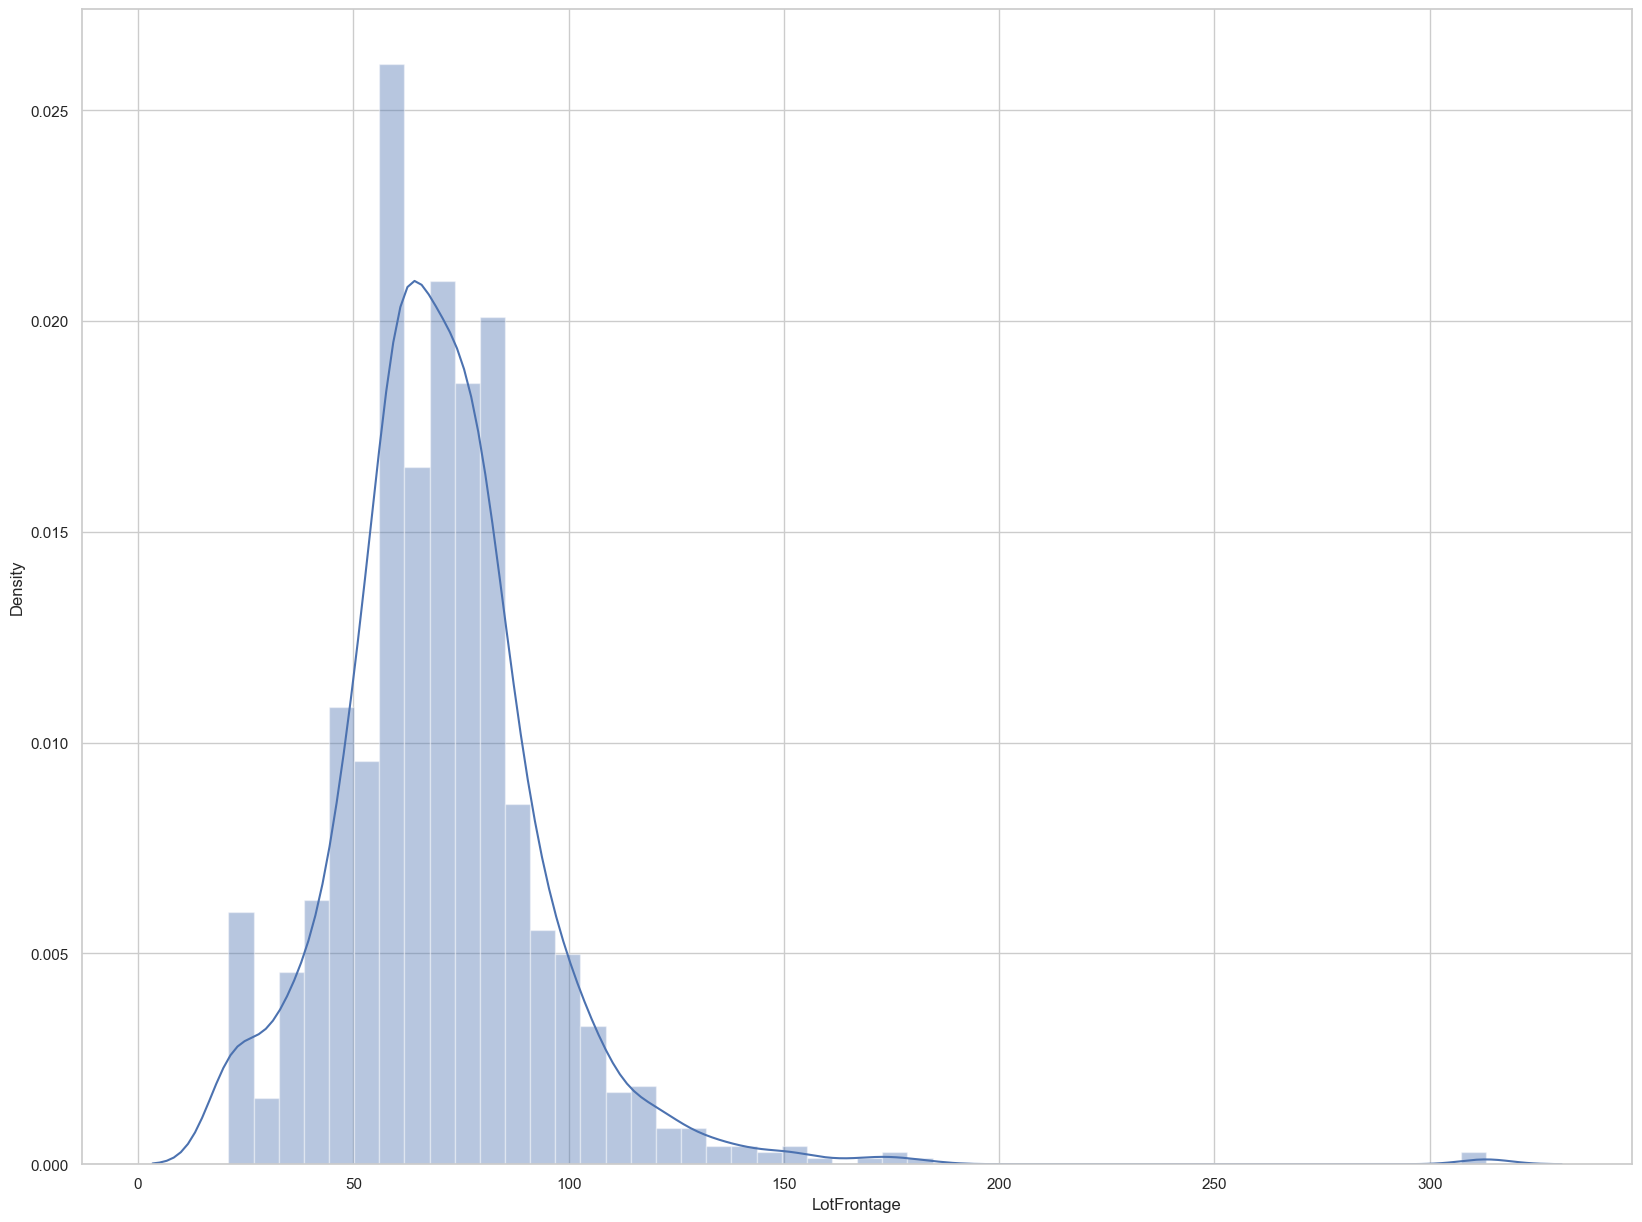

In [204]:
sns.distplot(df.LotFrontage)

 Getting the mean

In [205]:
df.LotFrontage.mean()

70.04995836802665

Checking the percentage of missing values

In [206]:
print('The percentage of missing data is:', df.LotFrontage.isnull().sum()/len(df)*100 , '%')

The percentage of missing data is: 17.73972602739726 %


### Now let's replace missing values with mean, since the percent of missing values is not very high

In [207]:
df.loc[df.LotFrontage.isnull() == True, 'LotFrontage'] = 70.04995836802665
df.LotFrontage.isnull().sum()

0

## Time to get to GarageYrBlt, since it's numerical, let's dive in


In [208]:
df['GarageYrBlt']

0      2,003.00
1      1,976.00
2      2,001.00
3      1,998.00
4      2,000.00
         ...   
1455   1,999.00
1456   1,978.00
1457   1,941.00
1458   1,950.00
1459   1,965.00
Name: GarageYrBlt, Length: 1460, dtype: float64

<AxesSubplot:xlabel='GarageYrBlt', ylabel='Density'>

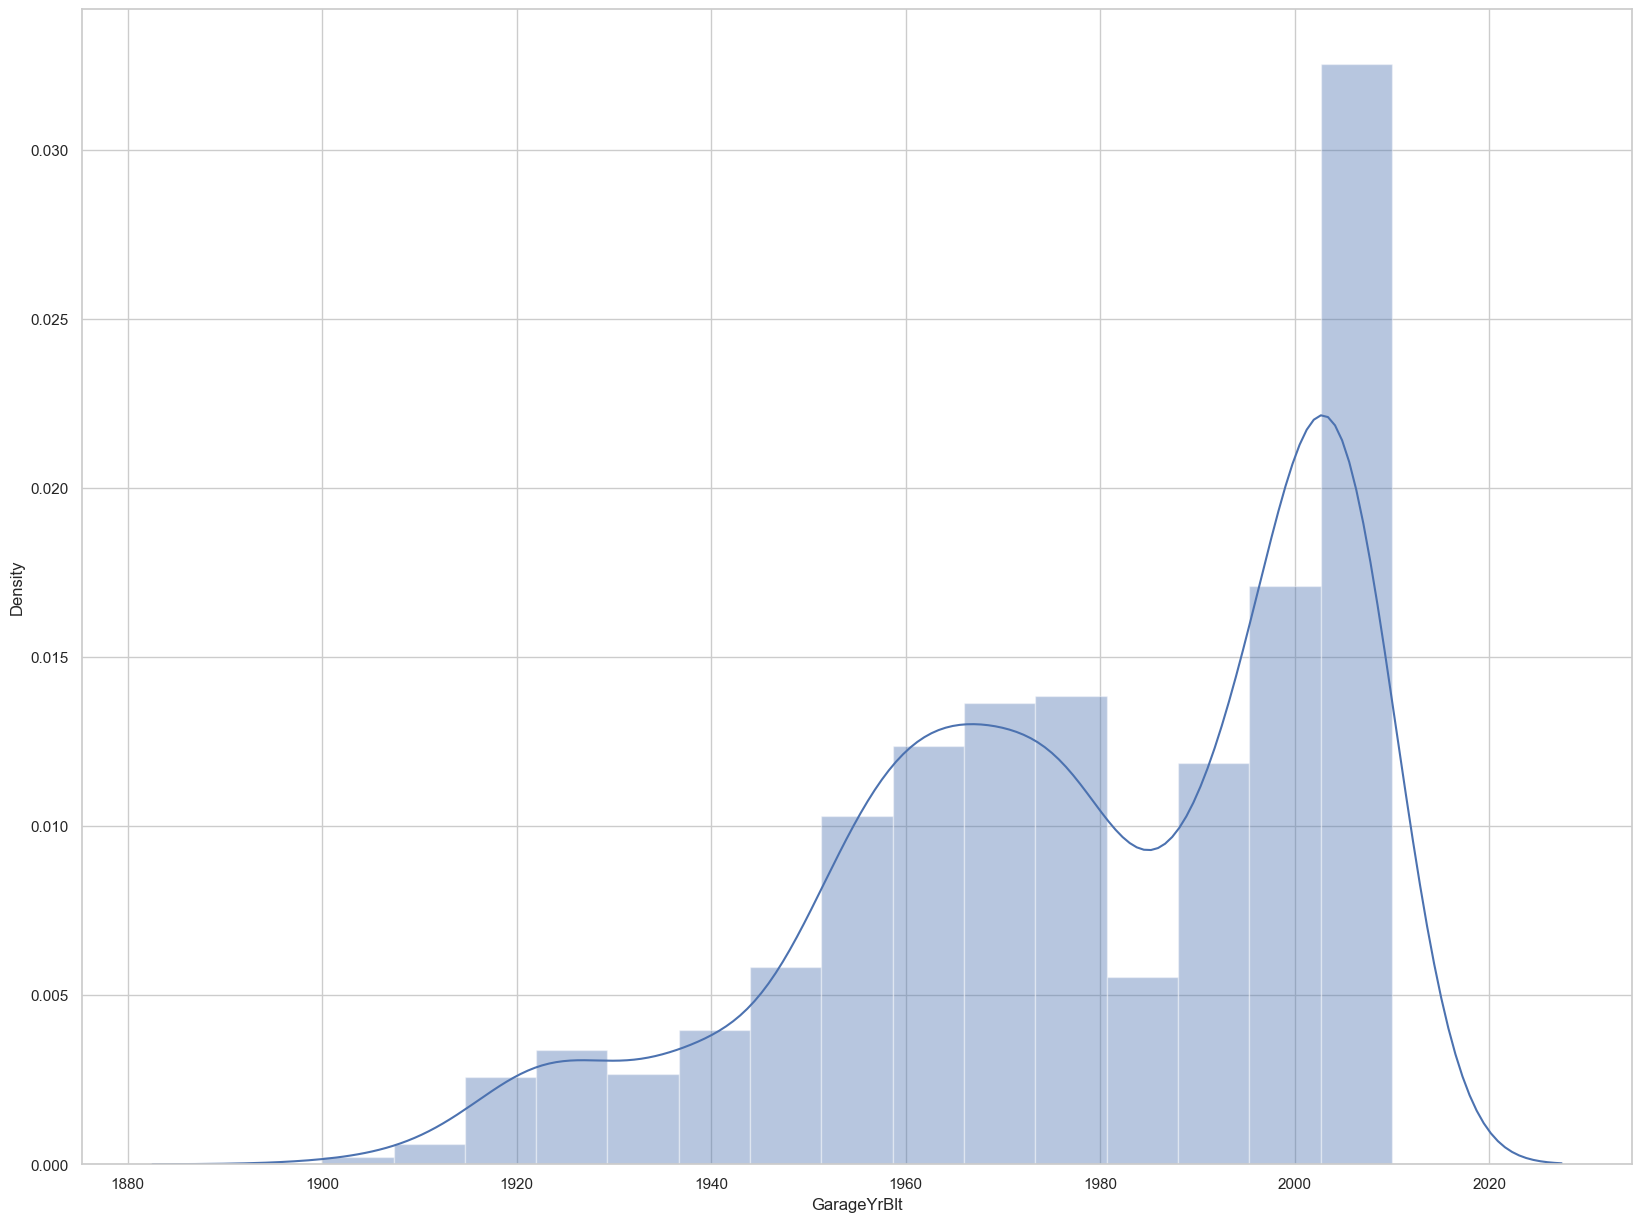

In [209]:
sns.distplot(df['GarageYrBlt'])

In [210]:
#Let's find mdeian value to fill the missing data
df['GarageYrBlt'].median()

1980.0

In [211]:
#Let's now replace the NaN with median of Garage Year Built
df['GarageYrBlt'].fillna(1980, inplace = True)

In [212]:
#Let's double check that we applied our changes and also dobule check our NaN values count
print(df.loc[df['GarageYrBlt'] == 1980]['GarageYrBlt'])
print(' Sum of NaN values is: ', df['GarageYrBlt'].isnull().sum())

39     1,980.00
48     1,980.00
78     1,980.00
88     1,980.00
89     1,980.00
         ...   
1349   1,980.00
1407   1,980.00
1449   1,980.00
1450   1,980.00
1453   1,980.00
Name: GarageYrBlt, Length: 96, dtype: float64
 Sum of NaN values is:  0


## Now let's deal with our last numerical feature 'MasVnrArea'

In [213]:
df['MasVnrArea'].isnull().sum()

8

<AxesSubplot:xlabel='MasVnrArea', ylabel='Density'>

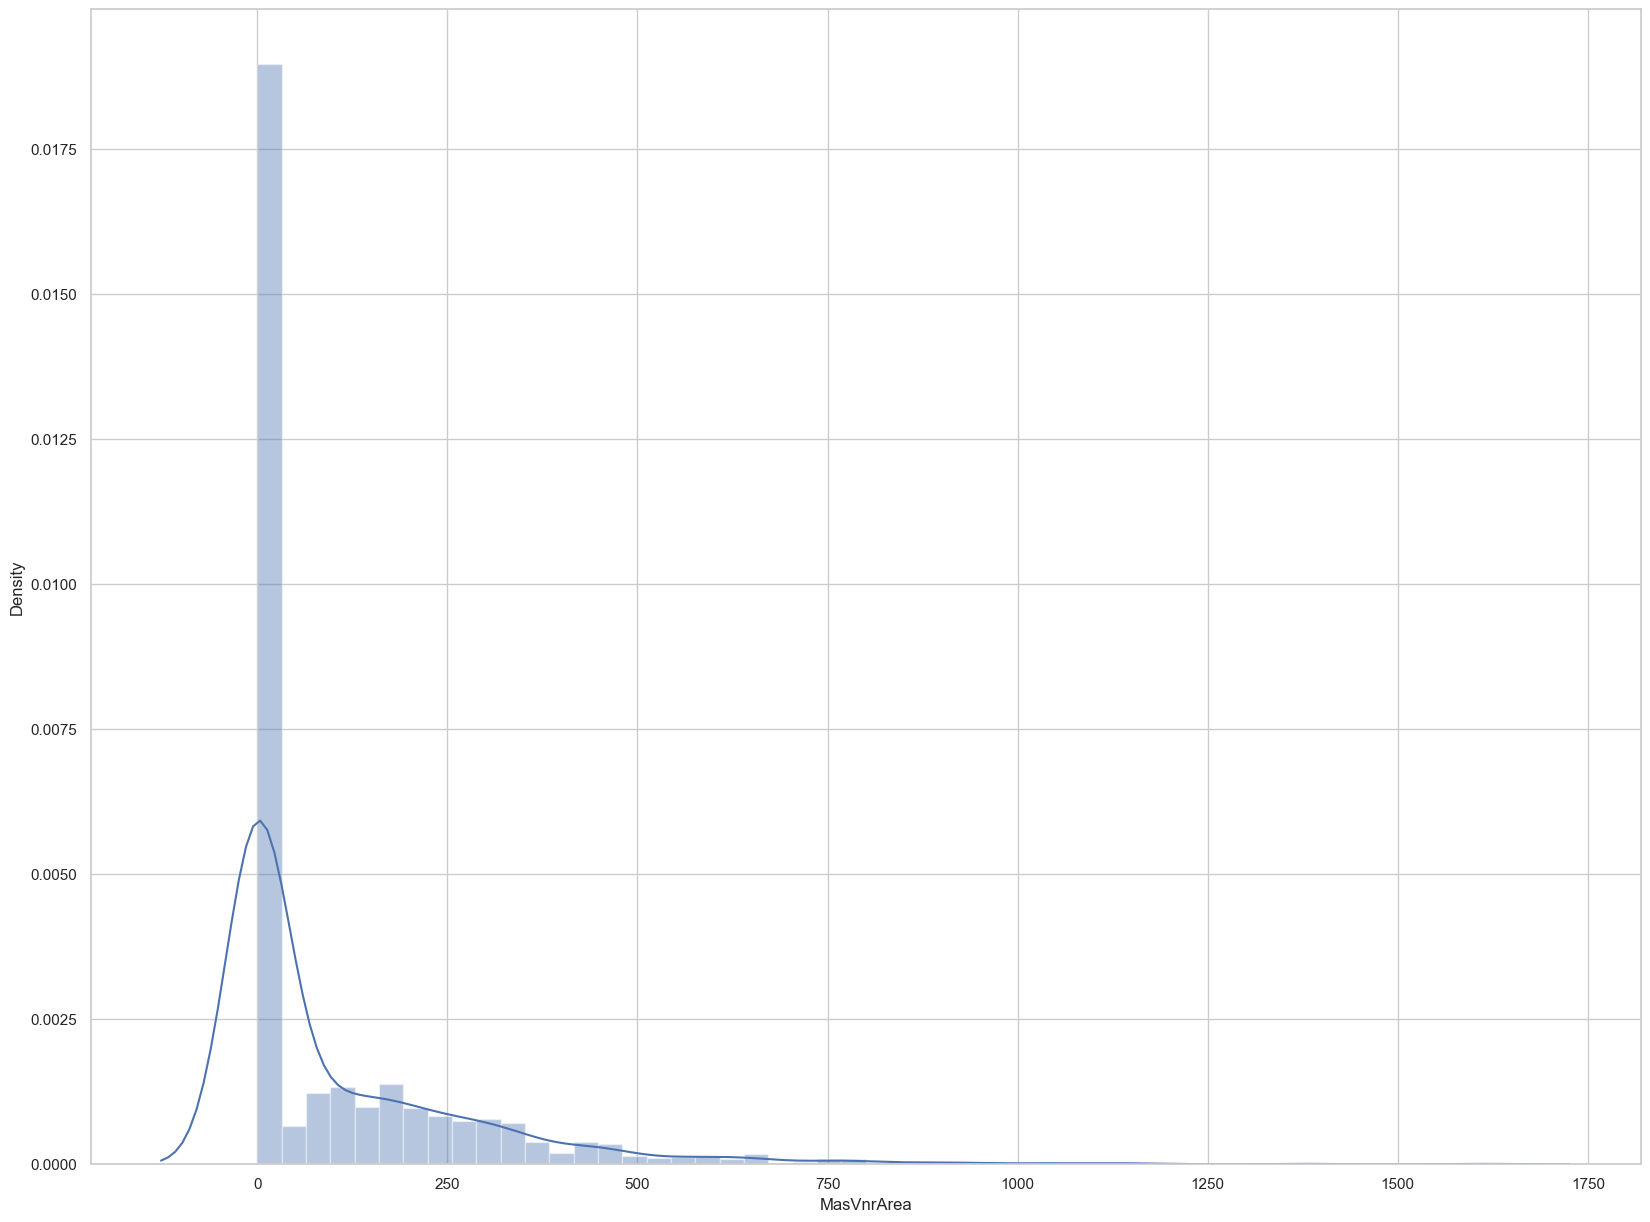

In [214]:
sns.distplot(df['MasVnrArea'])

In [215]:
df['MasVnrArea'].median()

0.0

## Important!

As we can see, the NaN values in MasVnrArea are located, where MasVnrType is 'NA', so it is equal to 0


In [216]:
df.loc[df['MasVnrArea'].isnull()]['MasVnrArea']

234    NaN
529    NaN
650    NaN
936    NaN
973    NaN
977    NaN
1243   NaN
1278   NaN
Name: MasVnrArea, dtype: float64

In [217]:
#Let's replace NaN with 0 (which is also a median)
df.MasVnrArea.fillna(0, inplace = True)

Let's check our results to make sure we are doing everything correct

In [218]:
df['MasVnrArea'].isnull().sum()

0

## Let's deal with other non-  numerical data


Before we start, let's make distibution plots, to find outliers and develop a tactic on handling missing values in those features

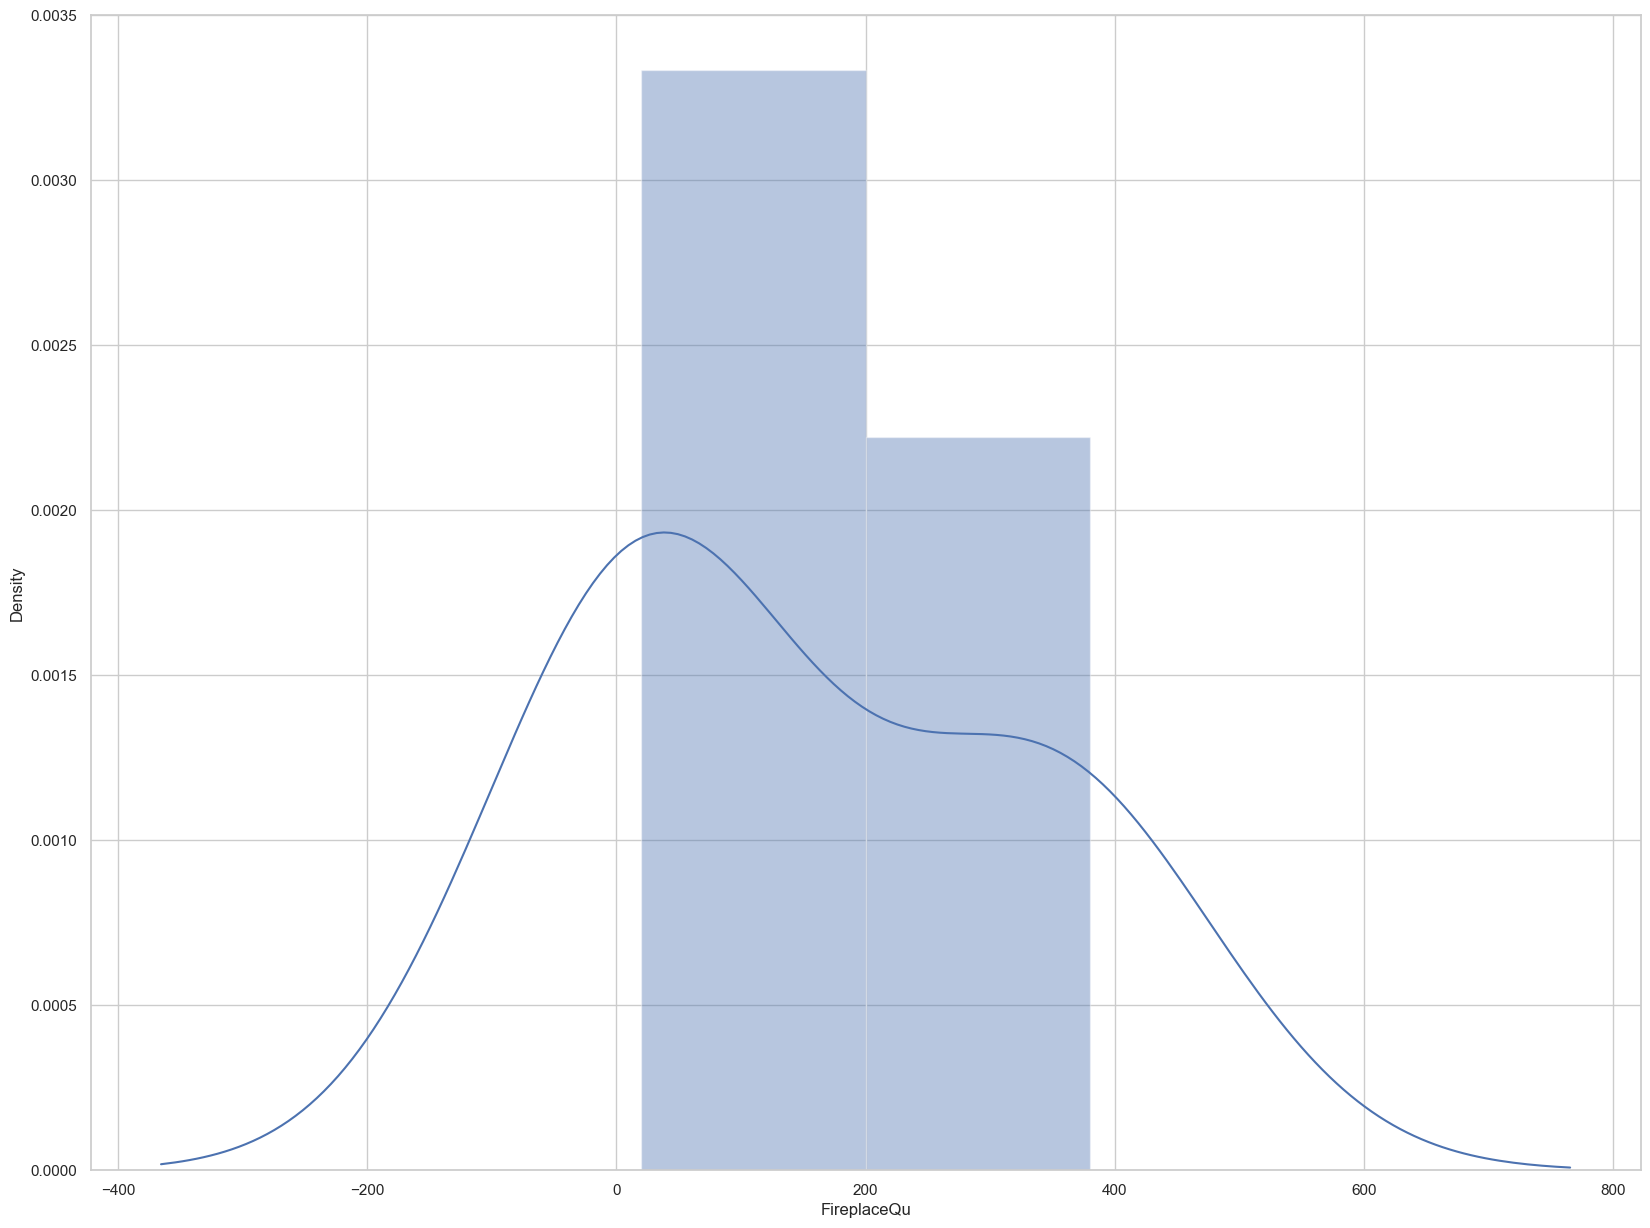

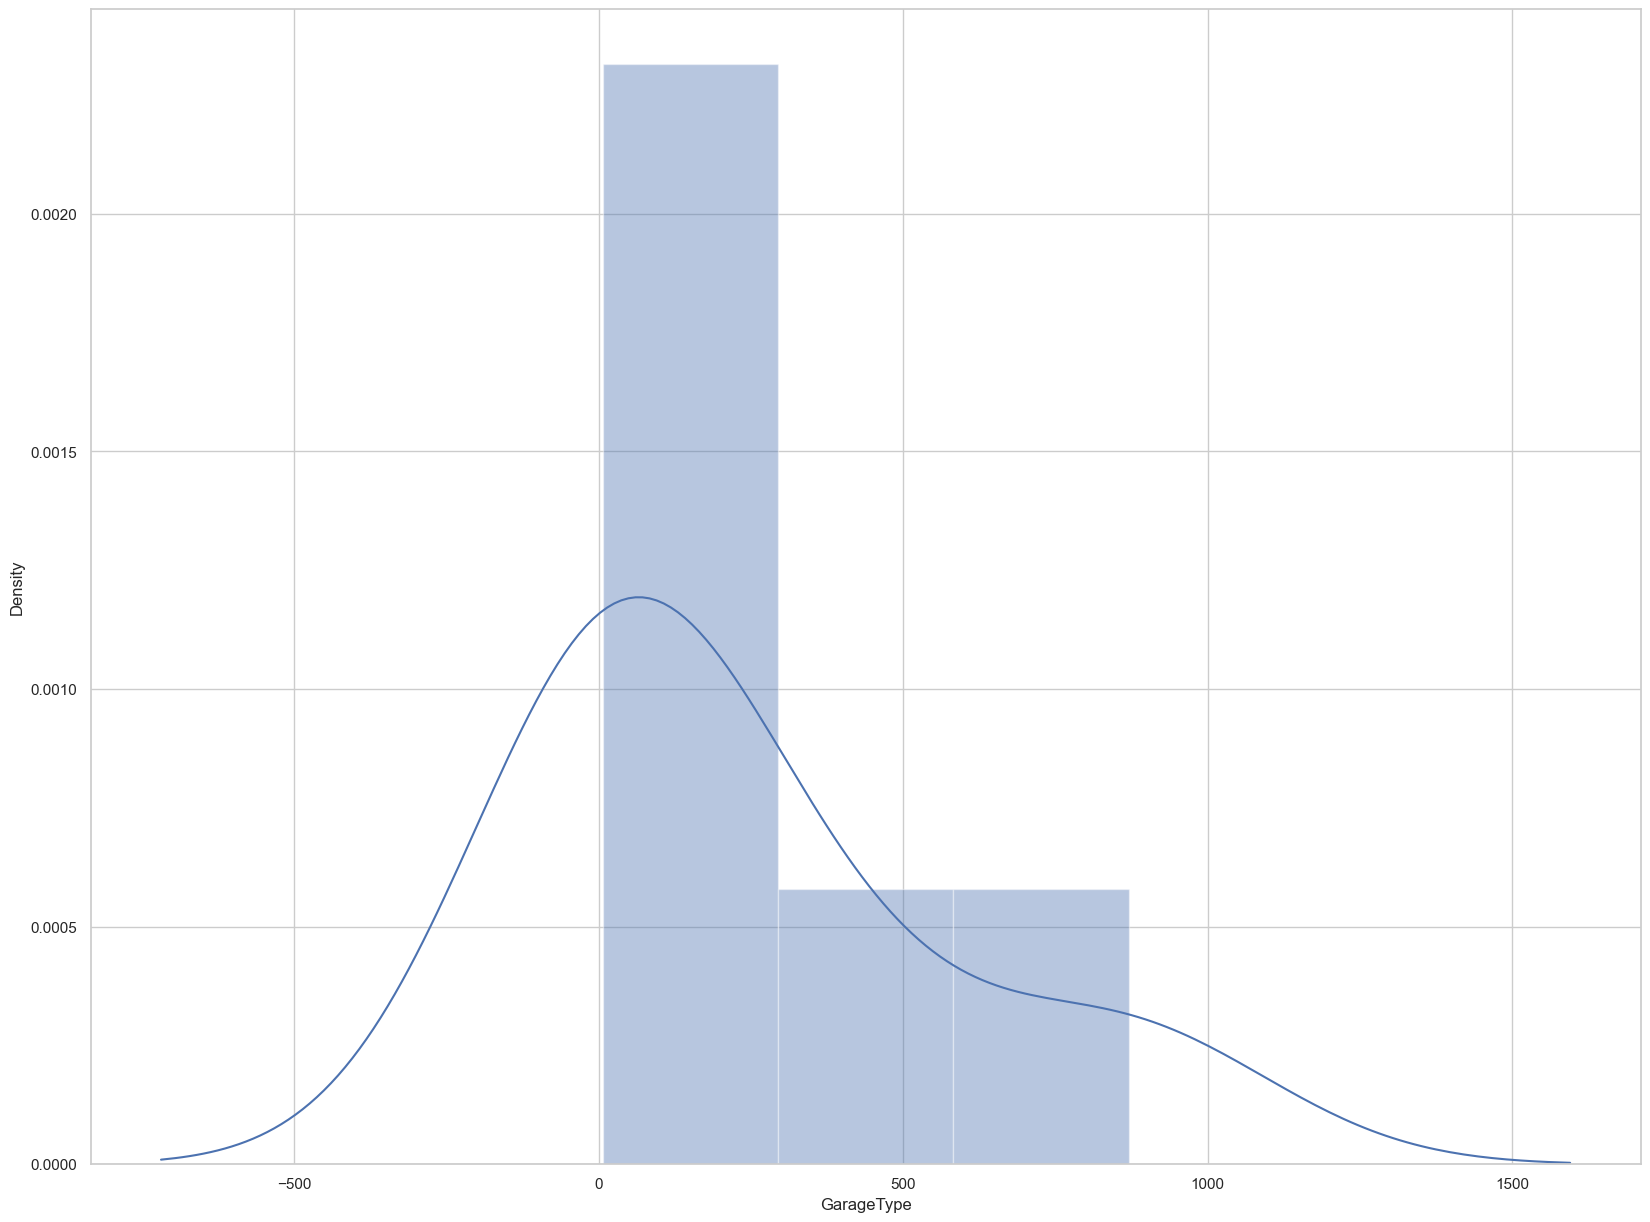

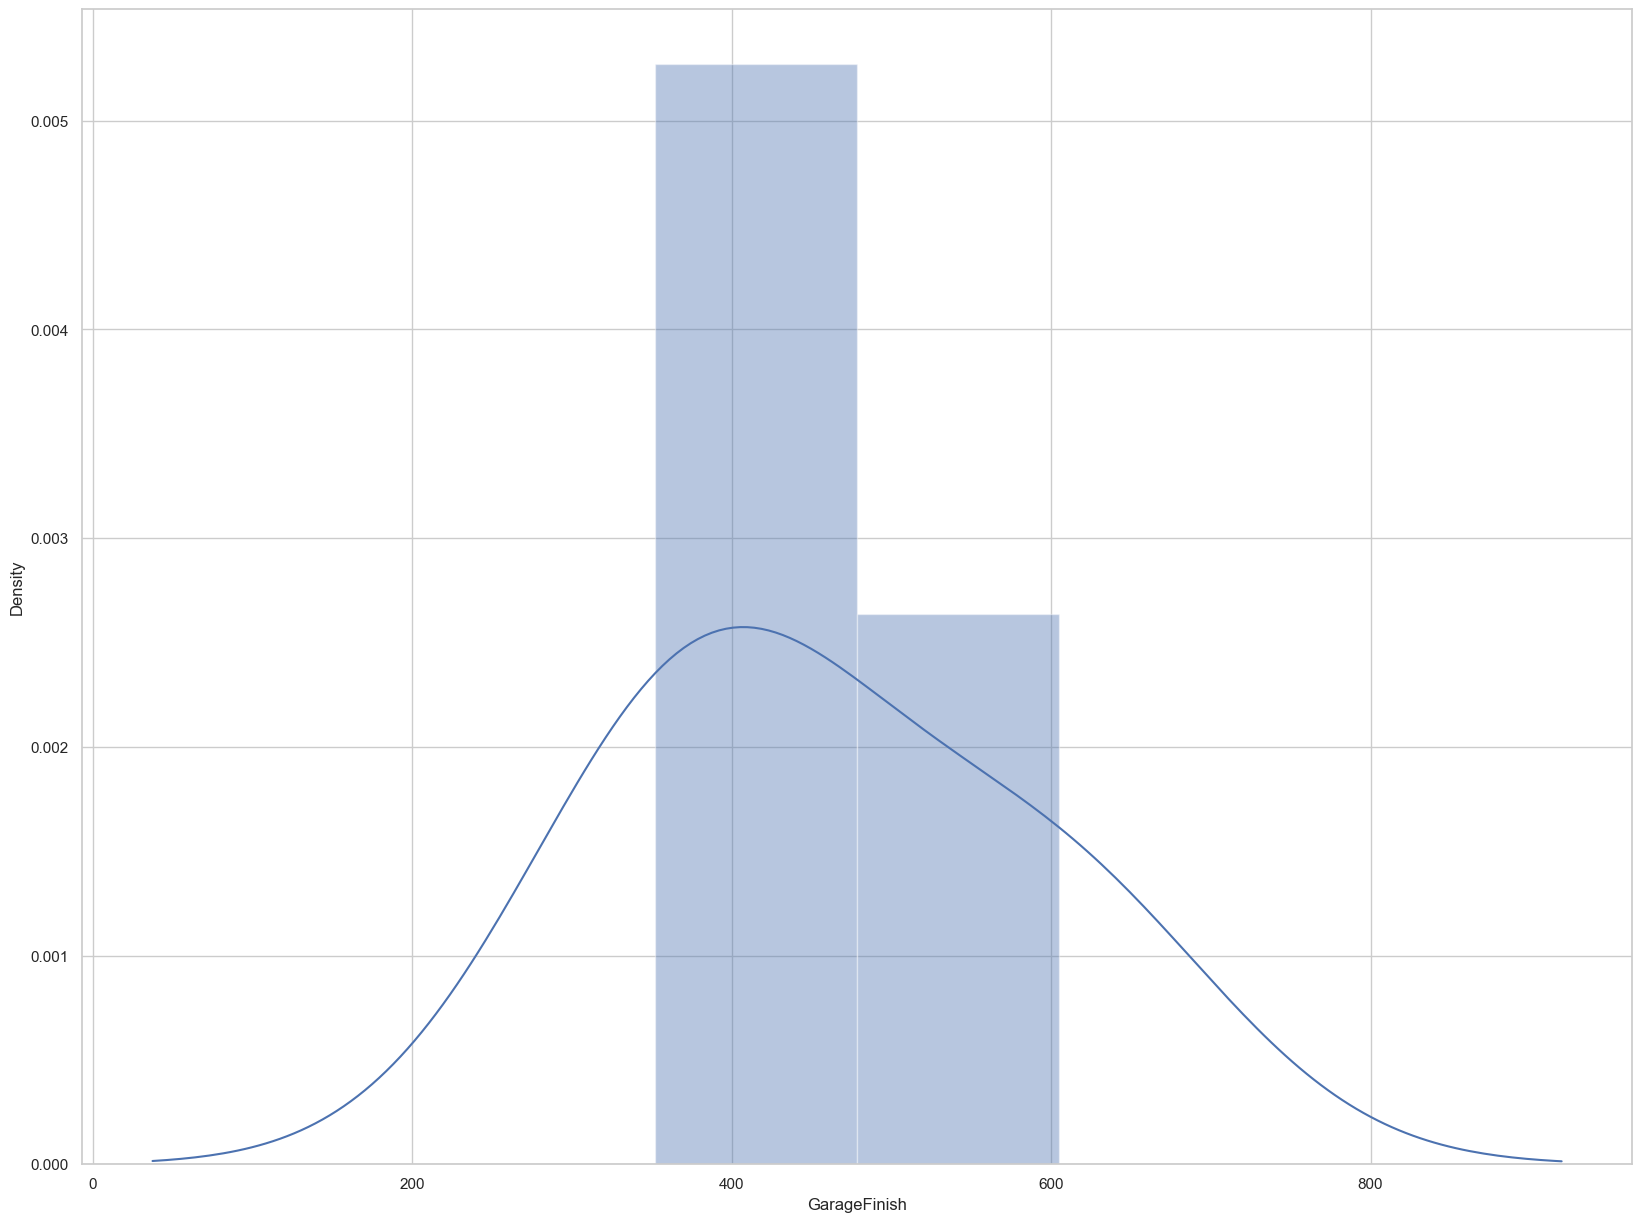

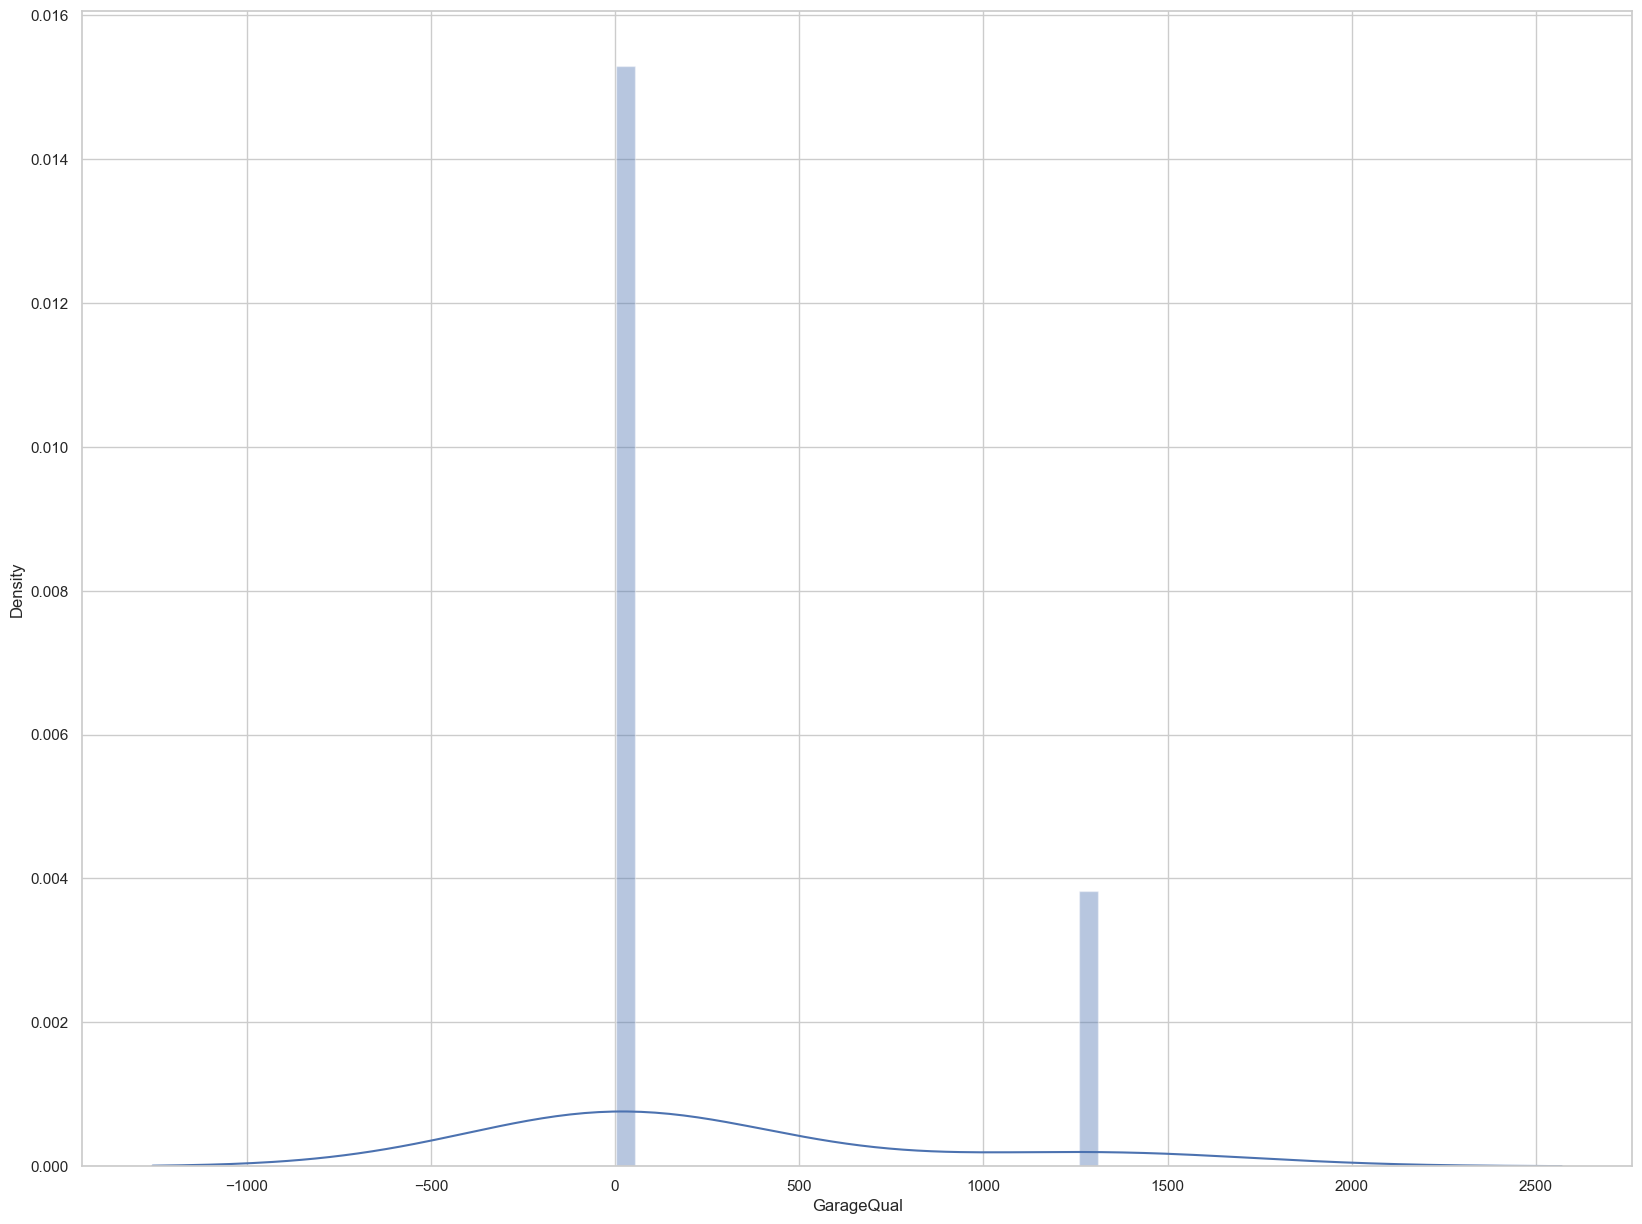

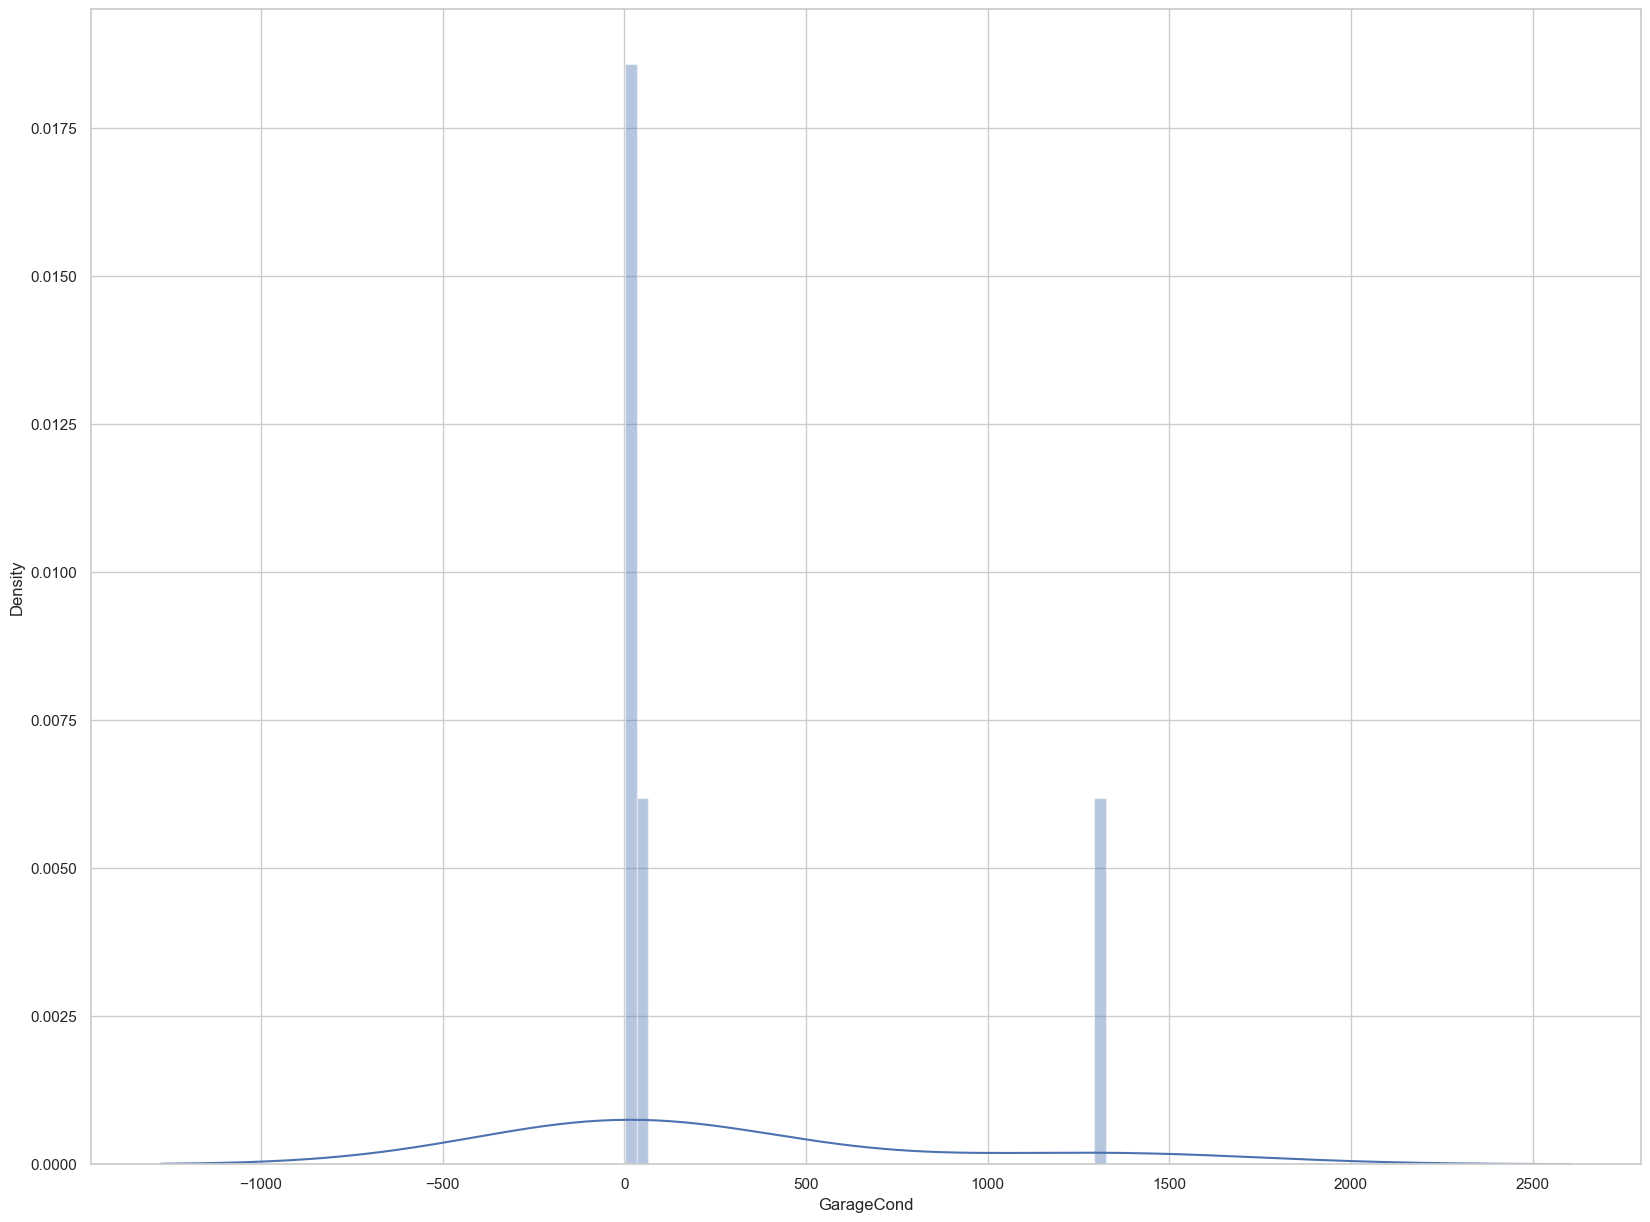

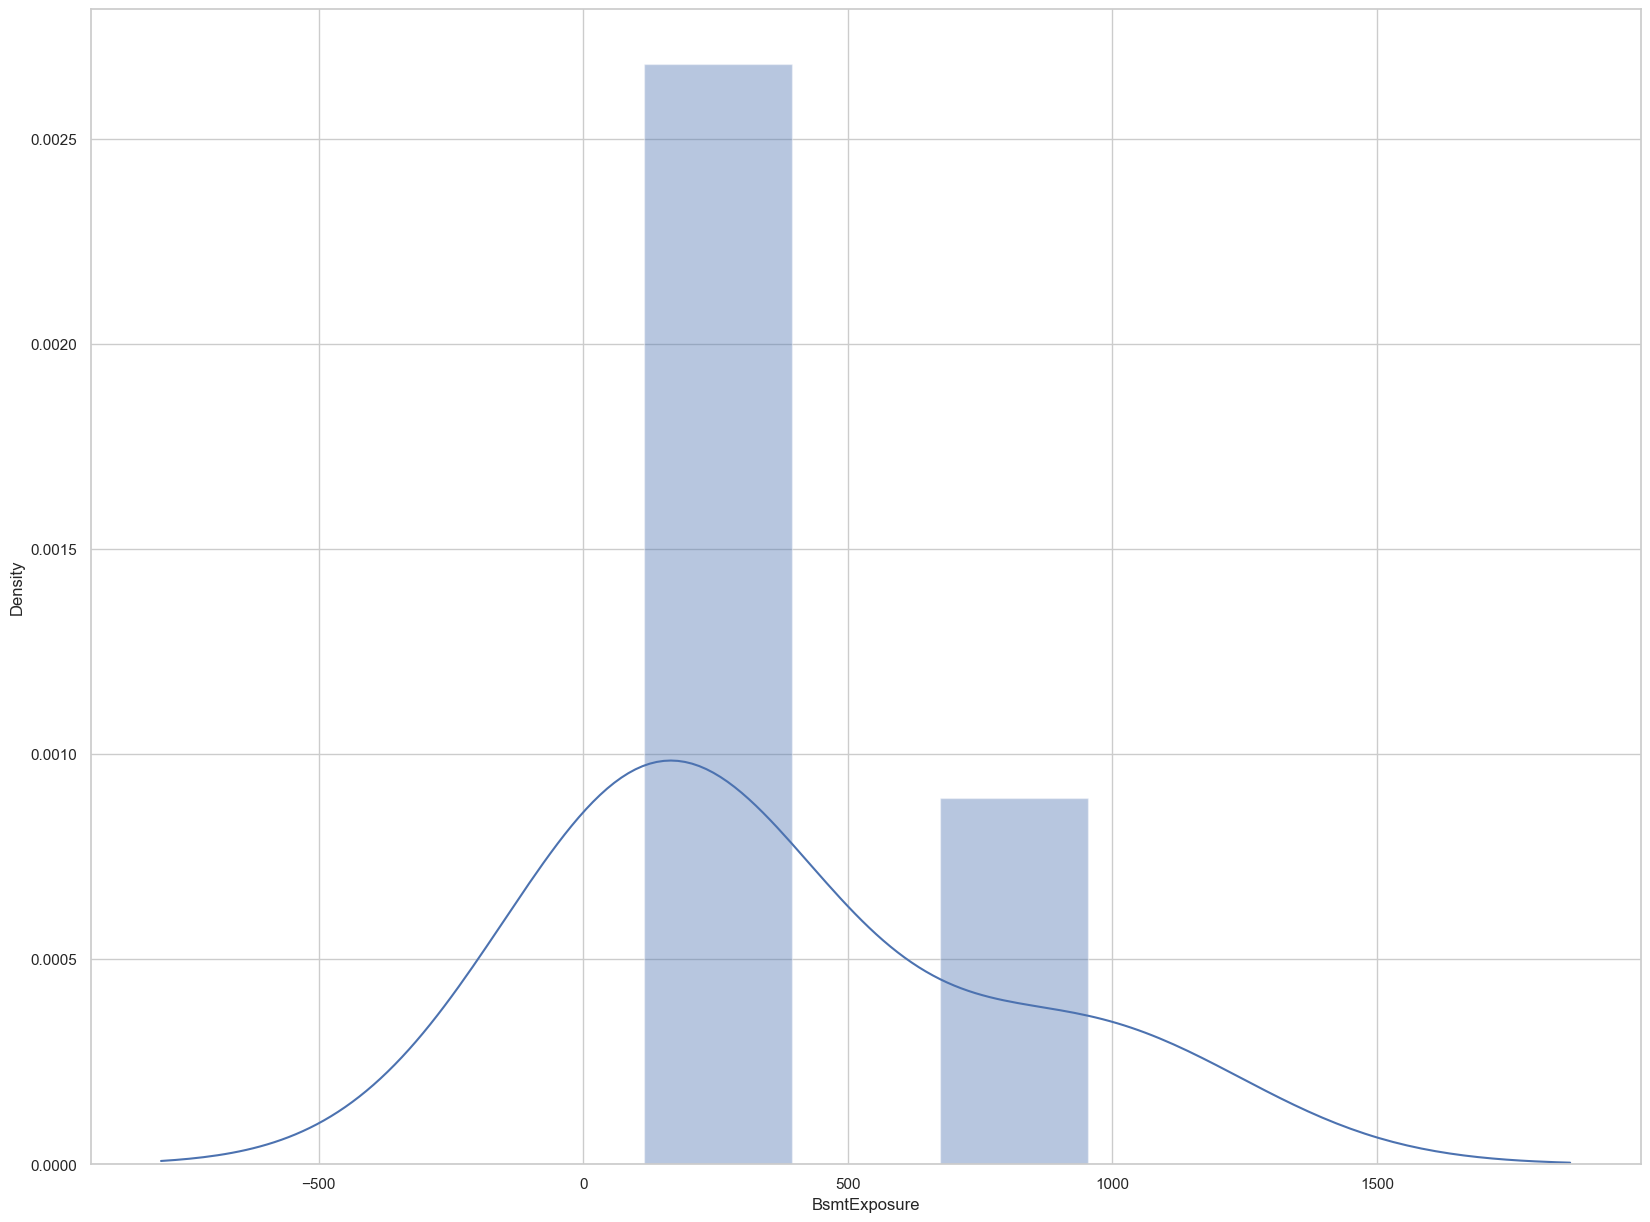

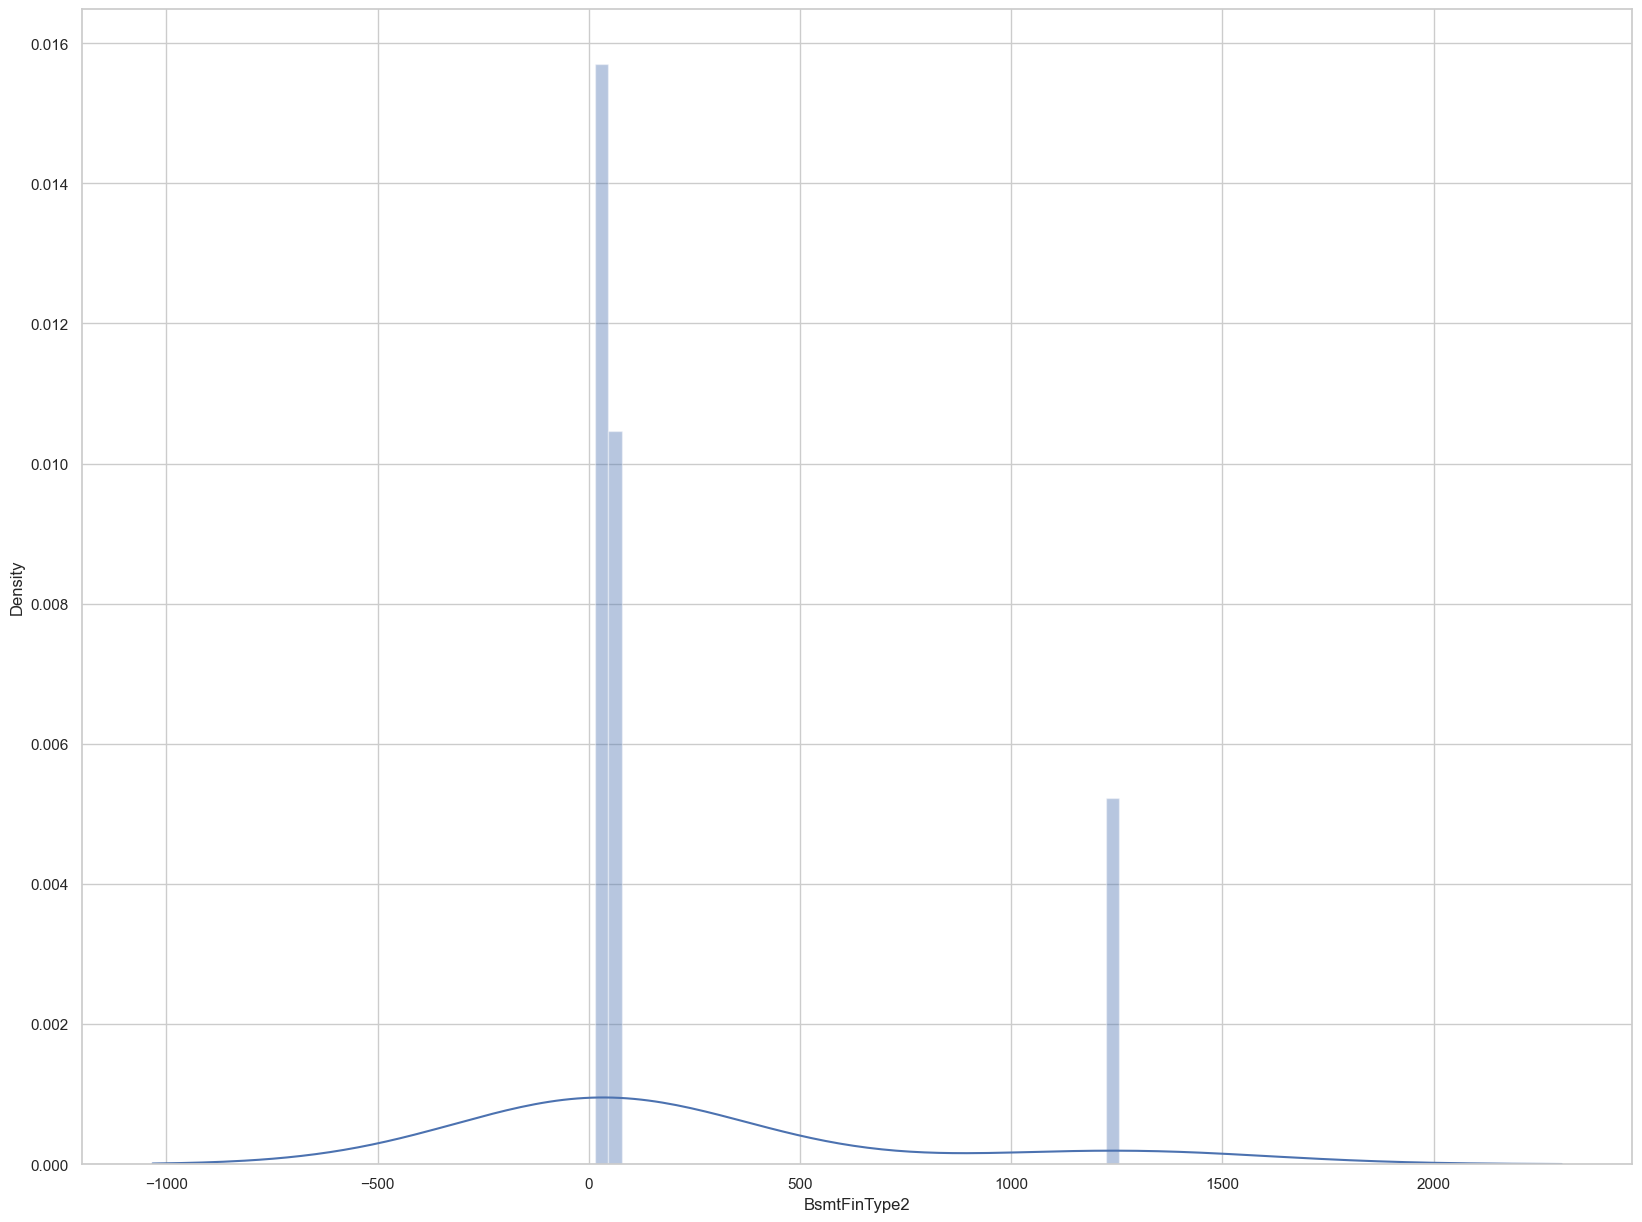

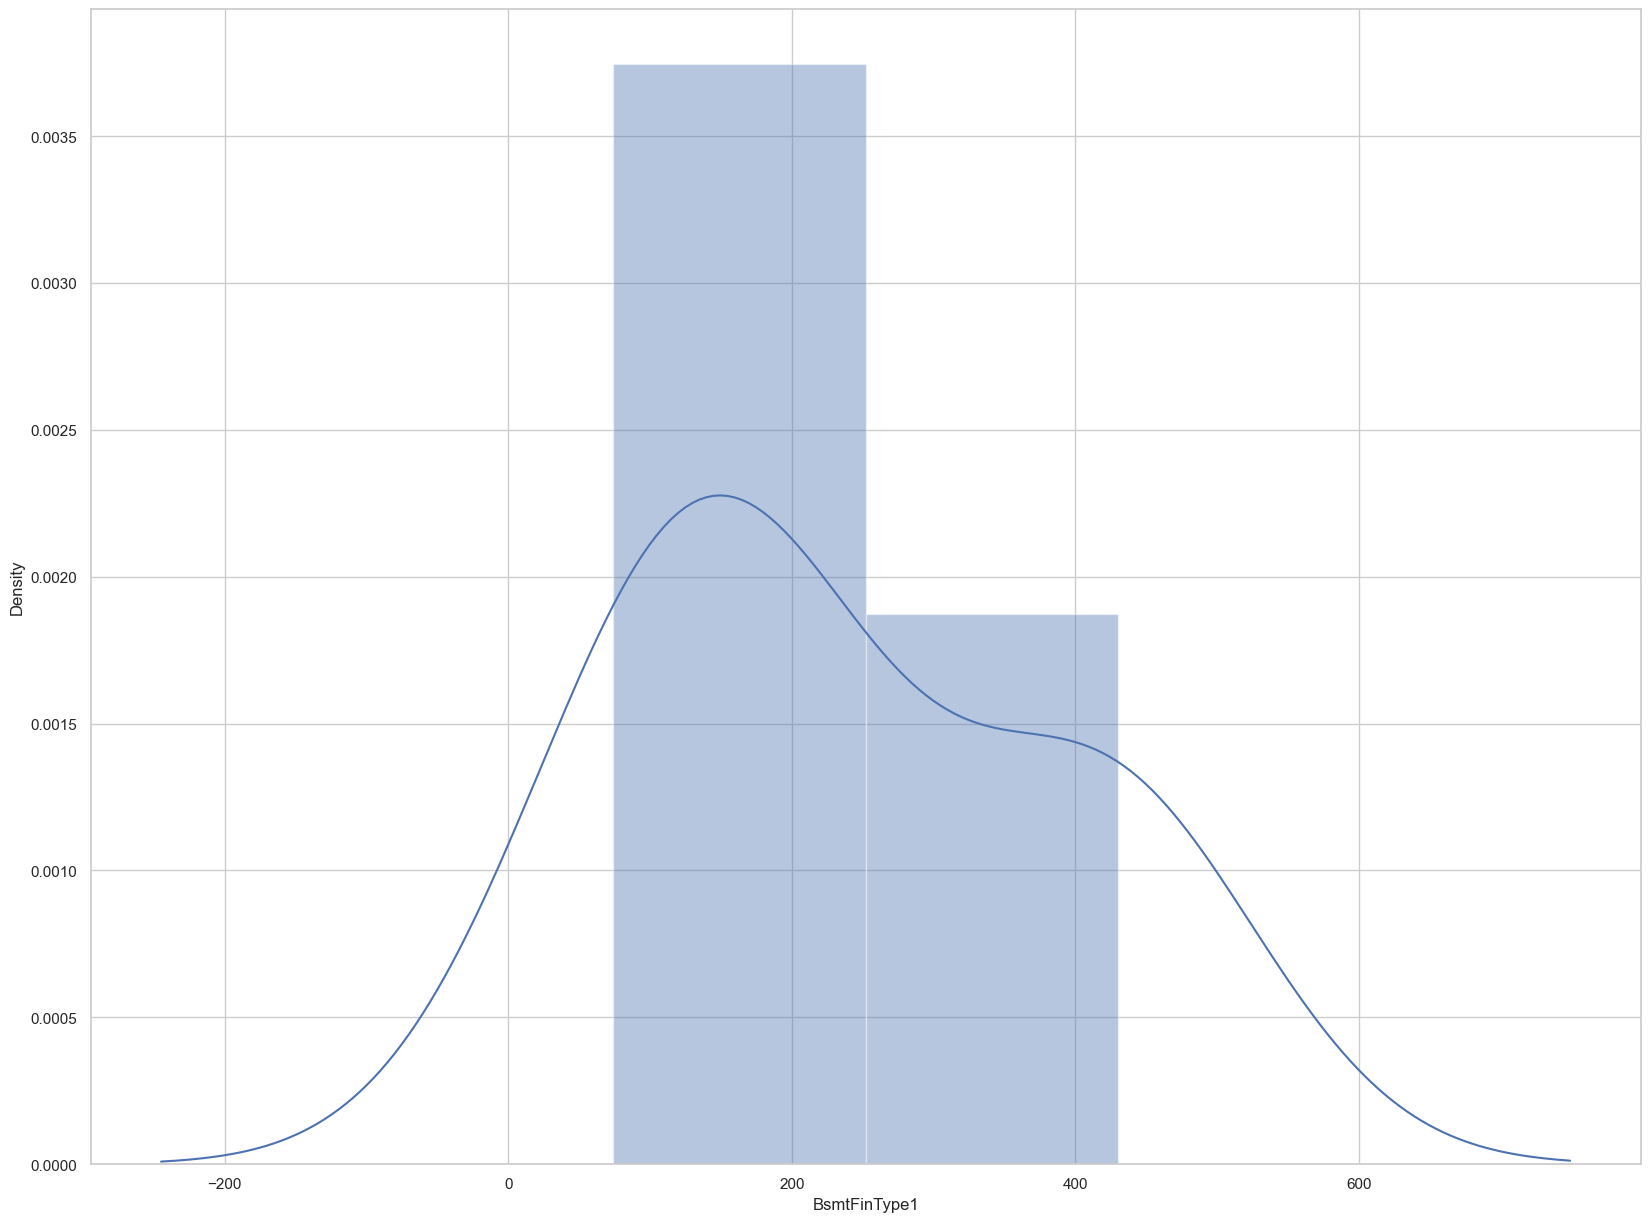

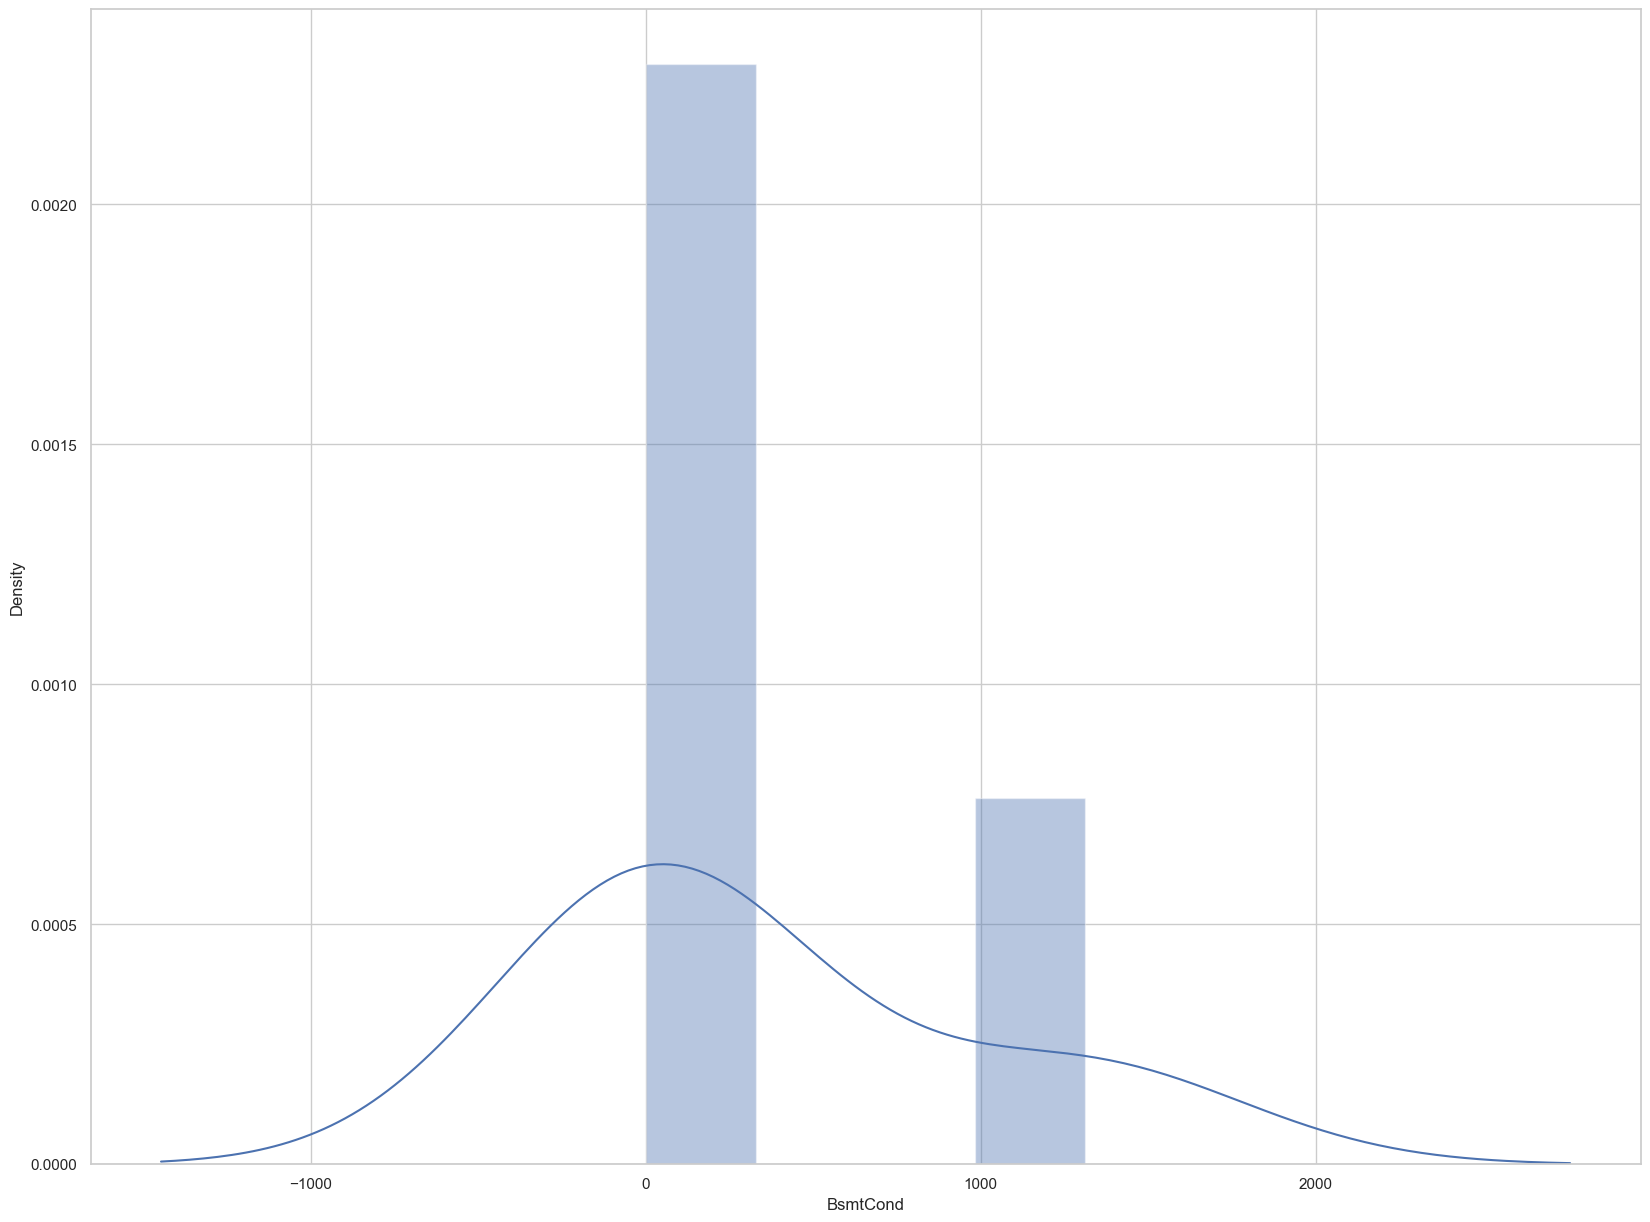

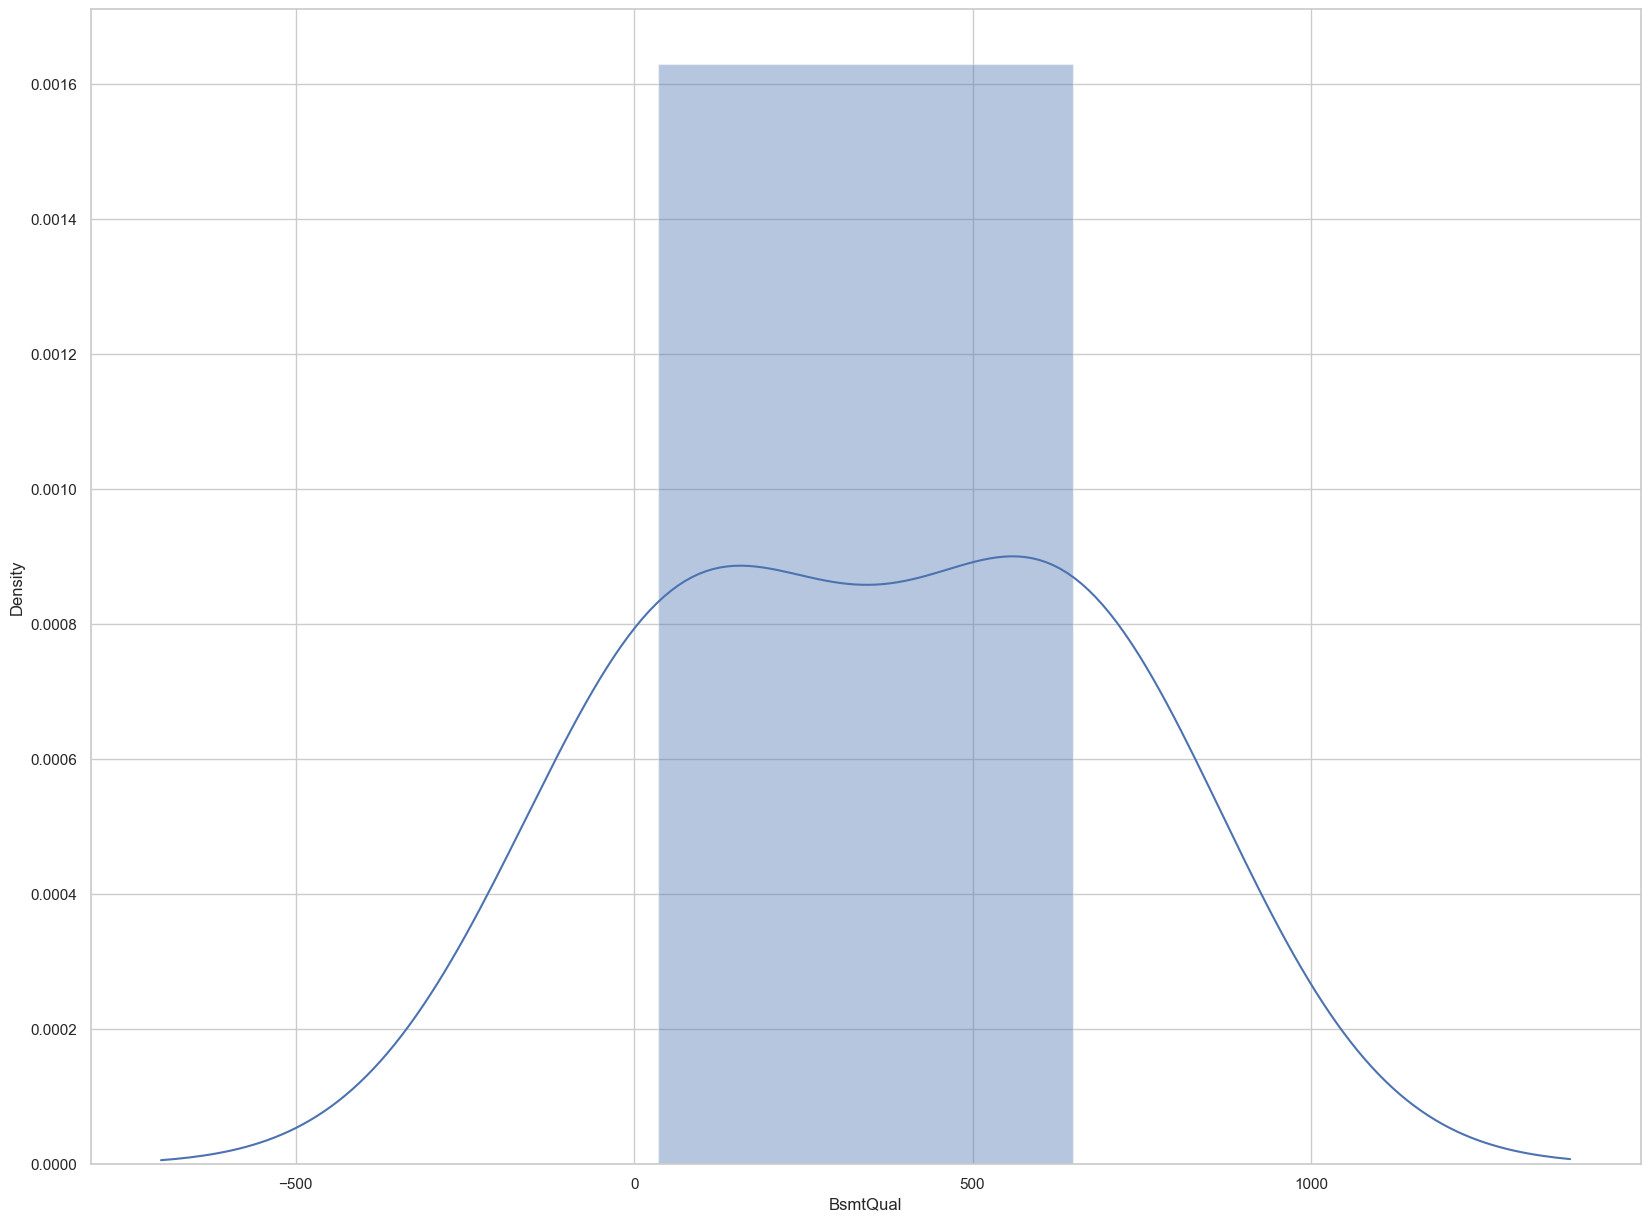

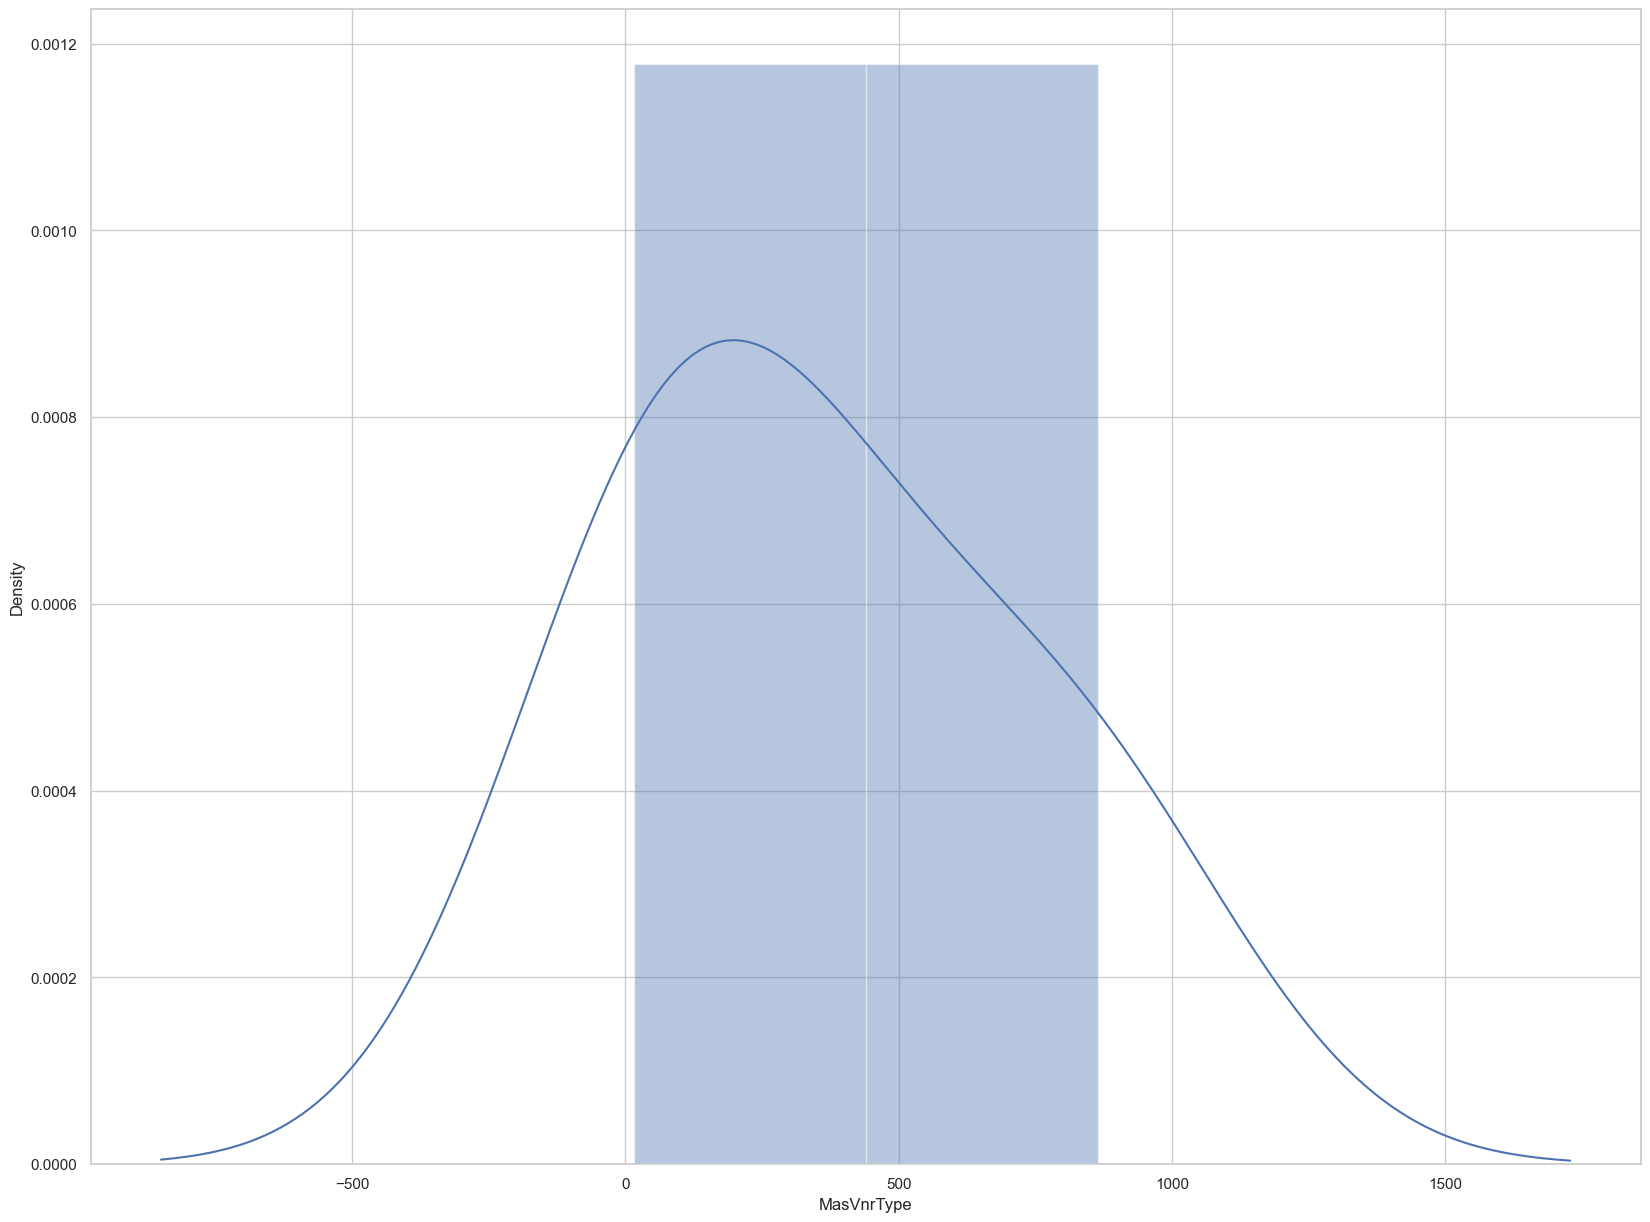

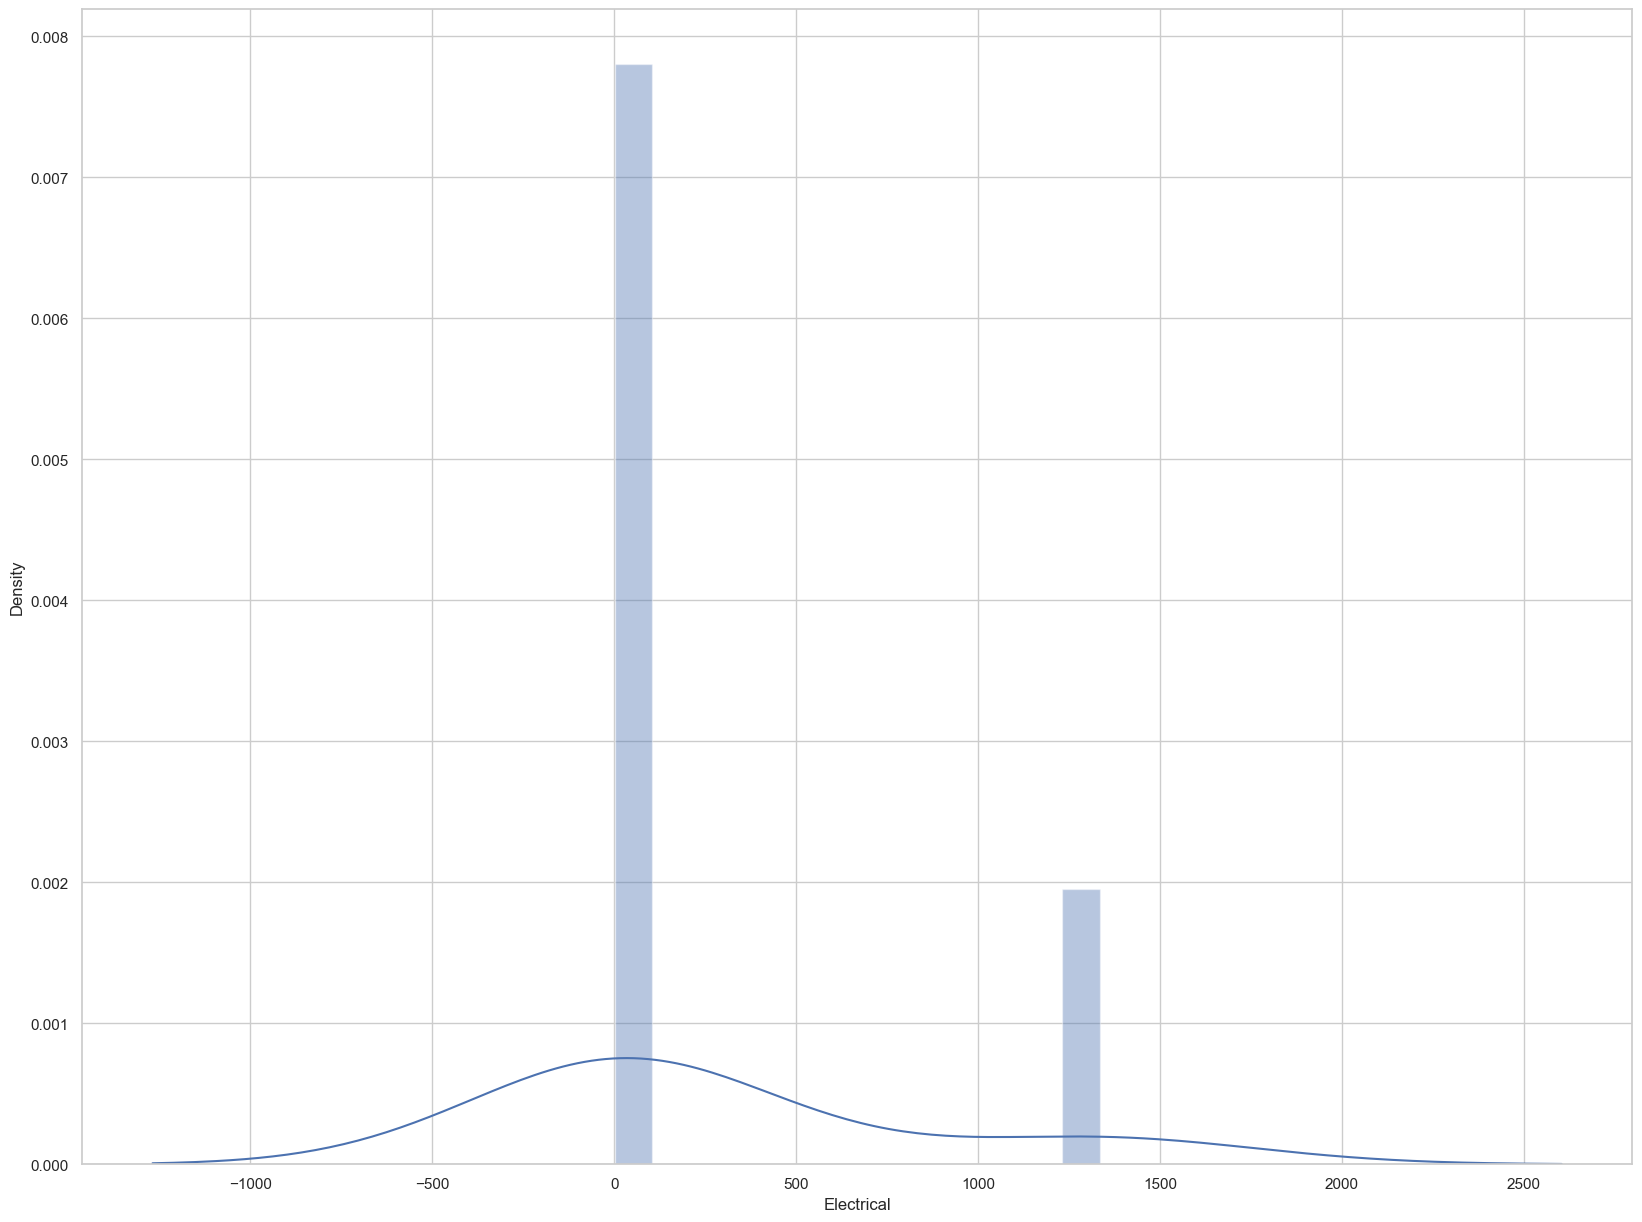

In [219]:
f1 = ['FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'BsmtExposure', 'BsmtFinType2', 'BsmtFinType1', 'BsmtCond', 'BsmtQual', 'MasVnrType', 'Electrical']
for i in df[f1]:
    plt.figure()
    sns.distplot(df[i].value_counts())
    

After observing distributions inequalities and big differences between min and max, let's check the number of each feature class being counted

In [220]:
for i in df[f1]:
    print(df[i].value_counts())

Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64
Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64
Unf    605
RFn    422
Fin    352
Name: GarageFinish, dtype: int64
TA    1311
Fa      48
Gd      14
Ex       3
Po       3
Name: GarageQual, dtype: int64
TA    1326
Fa      35
Gd       9
Po       7
Ex       2
Name: GarageCond, dtype: int64
No    953
Av    221
Gd    134
Mn    114
Name: BsmtExposure, dtype: int64
Unf    1256
Rec      54
LwQ      46
BLQ      33
ALQ      19
GLQ      14
Name: BsmtFinType2, dtype: int64
Unf    430
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
Name: BsmtFinType1, dtype: int64
TA    1311
Gd      65
Fa      45
Po       2
Name: BsmtCond, dtype: int64
TA    649
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64
None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64
SBrkr    1334
FuseA      94
FuseF      27
FuseP  

Now we can see that 'Electrical', 'BsmtCond', 'BsmtFinType2', 'GarageQual', 'GarageCond' have higly unequal distribution, so we will apply another aproach for those features, instead of just replacing them with 'NA'.
Let's replace them with the value that is most common for the feature selected


In [221]:
f2 = ['Electrical', 'BsmtCond', 'BsmtFinType2', 'GarageCond','GarageQual']
#MasVnrtype first
df['Electrical'].fillna('Sbrkr', inplace = True)
#BsmtFinType1
df['BsmtCond'].fillna('TA', inplace = True)
#BsmtExposure
df['BsmtFinType2'].fillna('Unf', inplace = True)
#GarageFinish
df['GarageQual'].fillna('TA', inplace = True)
#GarageQual
df['GarageCond'].fillna('TA', inplace = True)

Now let's see what other non-numerical features we got left, let's subtract 2 lists and make a new one in order to make no mistake


In [222]:
f1 = ['FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'BsmtExposure', 'BsmtFinType2', 'BsmtFinType1', 'BsmtCond', 'BsmtQual', 'MasVnrType', 'Electrical']
f2 = ['Electrical', 'BsmtCond', 'BsmtFinType2', 'GarageCond','GarageQual']
f3 = []
for i in f1:
    if i not in f2:
        f3.append(i)
print('Features to replace NaN with "NA": ', f3)

Features to replace NaN with "NA":  ['FireplaceQu', 'GarageType', 'GarageFinish', 'BsmtExposure', 'BsmtFinType1', 'BsmtQual', 'MasVnrType']


In [223]:
#replace chosen features NaN from f3 list above with 'NA'
df[f3] = df[f3].fillna('NA')
#Check the NaN values
df[f3].isnull().sum()

FireplaceQu     0
GarageType      0
GarageFinish    0
BsmtExposure    0
BsmtFinType1    0
BsmtQual        0
MasVnrType      0
dtype: int64

In [224]:
correlation_m = df[numeric].corr


In [225]:
df[numeric]

LotFrontage  GarageYrBlt  MasVnrArea
0           65.00     2,003.00      196.00
1           80.00     1,976.00        0.00
2           68.00     2,001.00      162.00
3           60.00     1,998.00        0.00
4           84.00     2,000.00      350.00
...           ...          ...         ...
1455        62.00     1,999.00        0.00
1456        85.00     1,978.00      119.00
1457        66.00     1,941.00        0.00
1458        68.00     1,950.00        0.00
1459        75.00     1,965.00        0.00

[1460 rows x 3 columns]

In [226]:
num_feat = []
cat_feat = []

for i in df:
    if i in numdf:
        num_feat.append(i)
    else:
        cat_feat.append(i)
print('List of numeric column values: ', num_feat)
print('\n')
print('List of objects column values: ', cat_feat)

List of numeric column values:  ['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice', 'LogSalePrice']


List of objects column values:  ['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'Kitch

Text(0.5, 1.0, 'SalePrice Correlation')

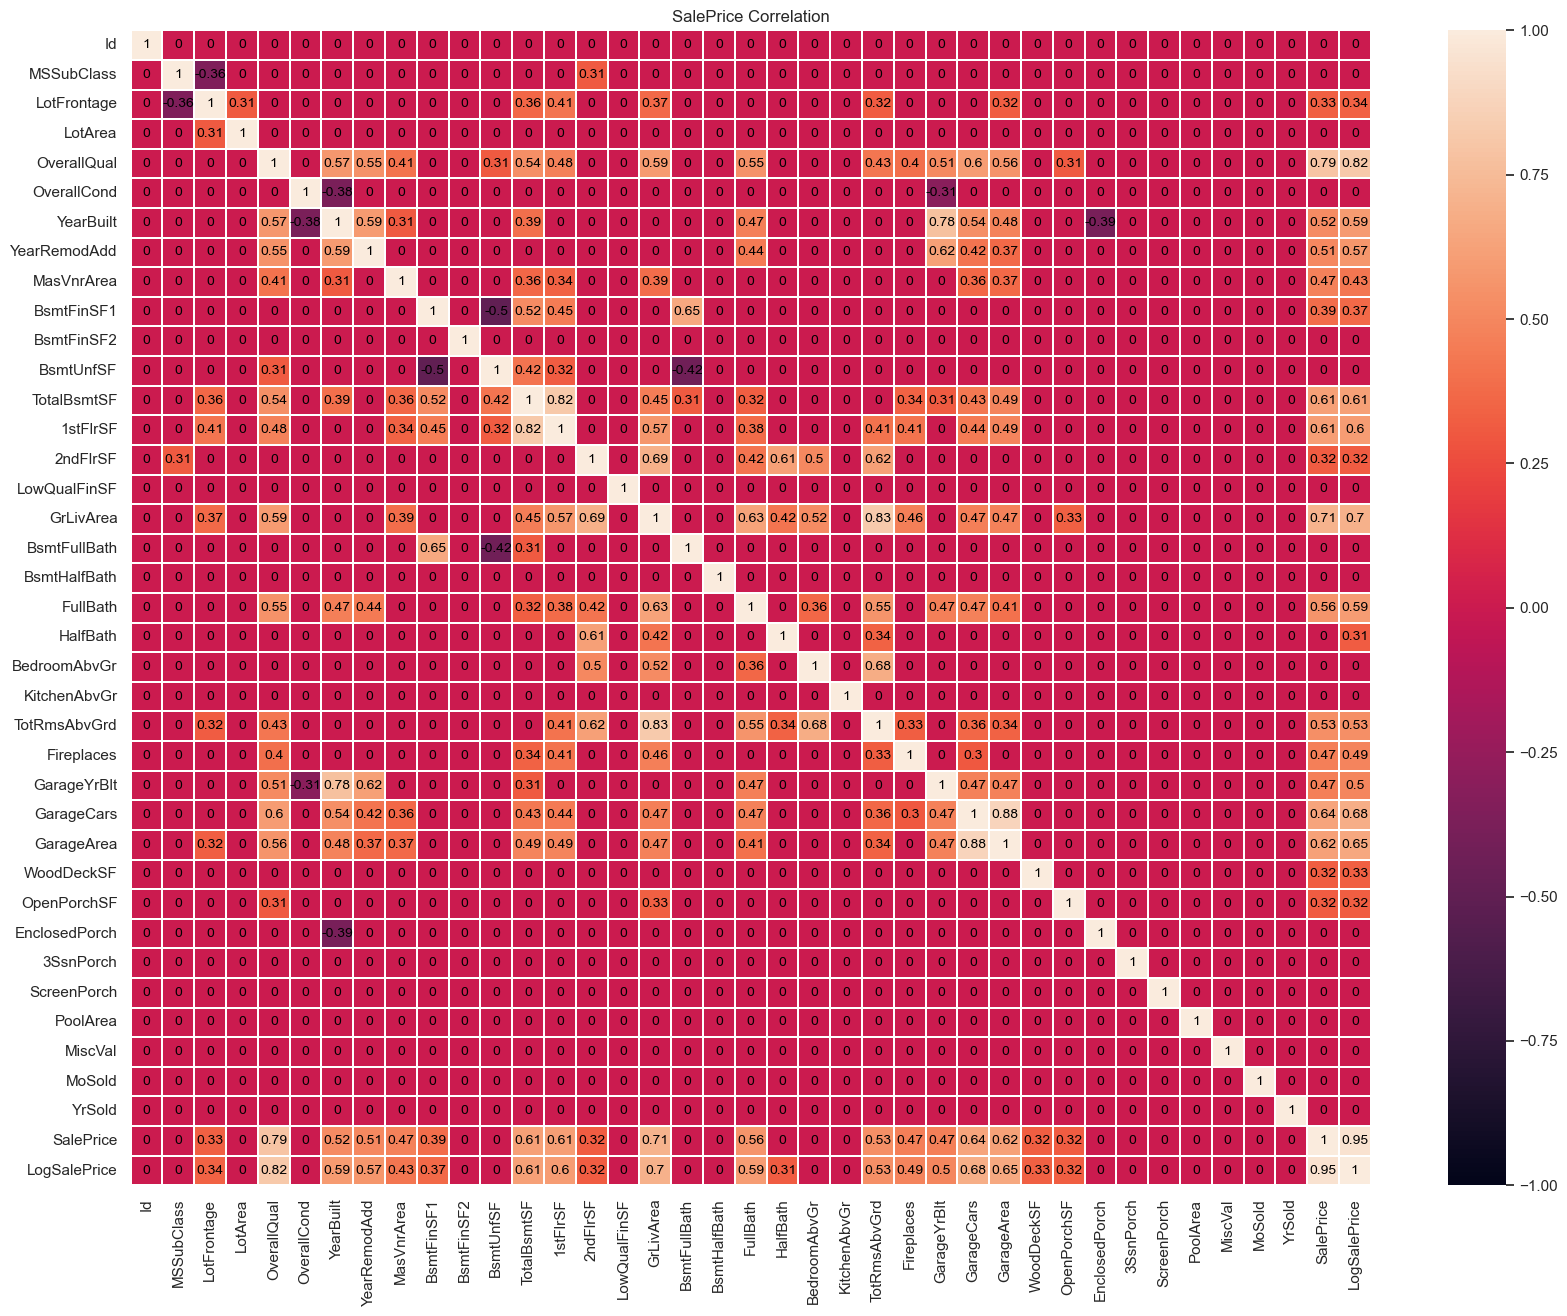

In [227]:
# Heatmap for all the remaining numerical data including the taget 'SalePrice'
# Define the heatmap parameters
pd.options.display.float_format = "{:,.2f}".format

# Define correlation matrix
corr_matrix = df[num_feat].corr()

# Replace correlation < |0.3| by 0 for a better visibility
corr_matrix[(corr_matrix < 0.3) & (corr_matrix > -0.3)] = 0

# plot the heatmap
sns.heatmap(corr_matrix, vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot_kws={"size": 10, "color": "black"},annot=True)
plt.title("SalePrice Correlation")

The highest correlation with SalePrice is observed in GarageCars and GarageArea, GrLivArea,TotalbsmtSF, OverallQual

In [228]:
corr = df.corr()['SalePrice'].sort_values(ascending = False)[2:10]
corr

OverallQual    0.79
GrLivArea      0.71
GarageCars     0.64
GarageArea     0.62
TotalBsmtSF    0.61
1stFlrSF       0.61
FullBath       0.56
TotRmsAbvGrd   0.53
Name: SalePrice, dtype: float64

Now we have our Features selected. Let's proceed to EDA


## Deeper into the data

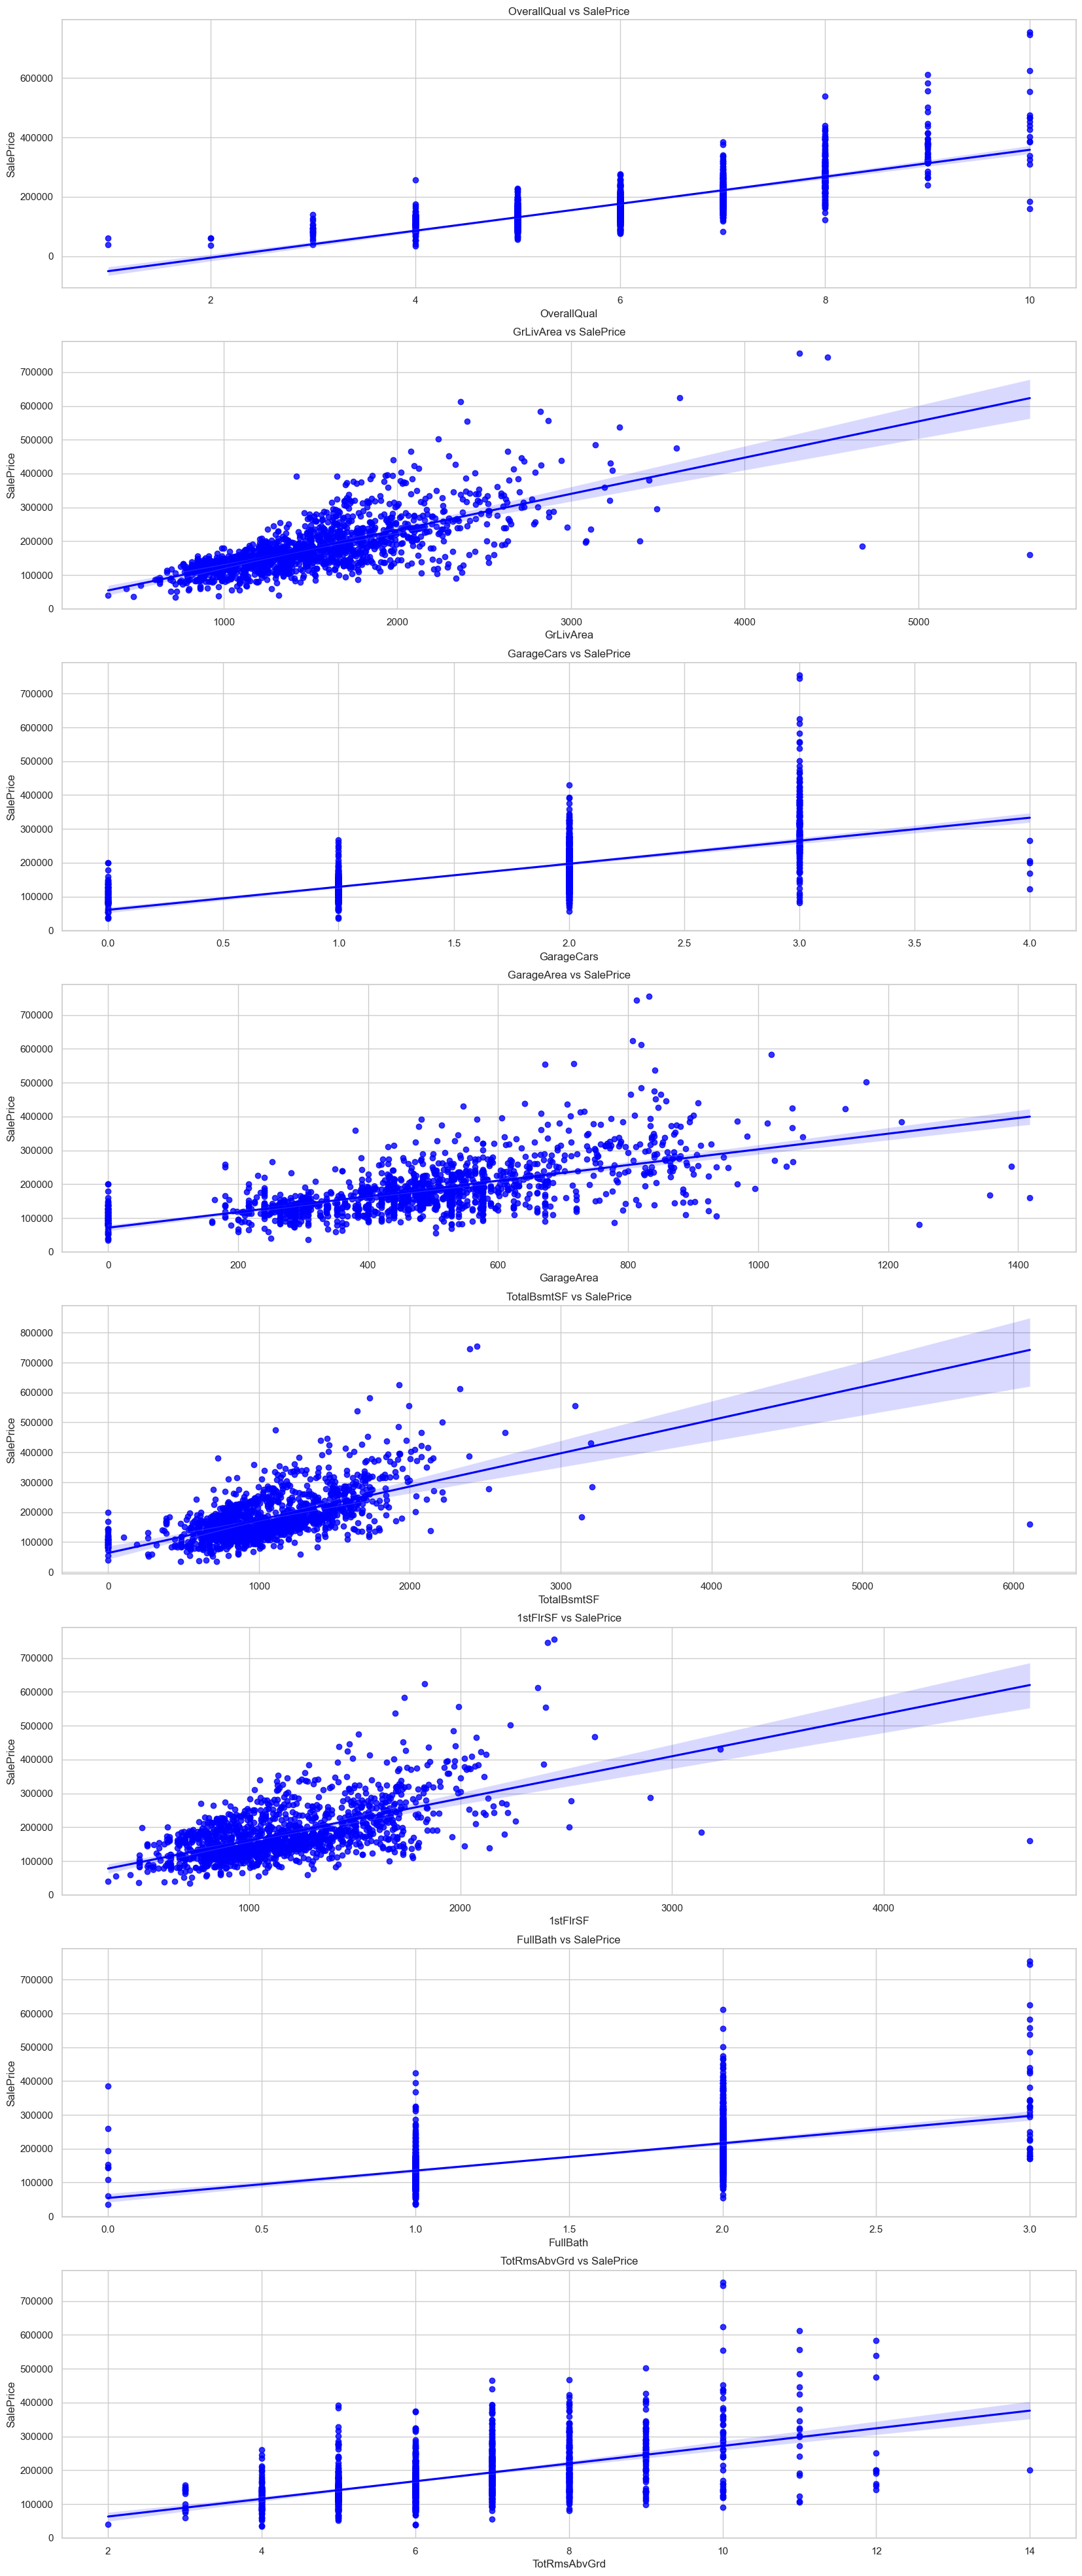

In [229]:
f, ax = plt.subplots(nrows = 8, ncols = 1, figsize = (20,50))
for i, col in enumerate(corr.index):
    sns.regplot(x = col, y = 'SalePrice', data = df, ax = ax[i], color = 'blue')
    ax[i].set_title(f'{col} vs SalePrice')

## Let's take a closer look at our dataset to get more insights
Let's look at the amount of houses built for each year

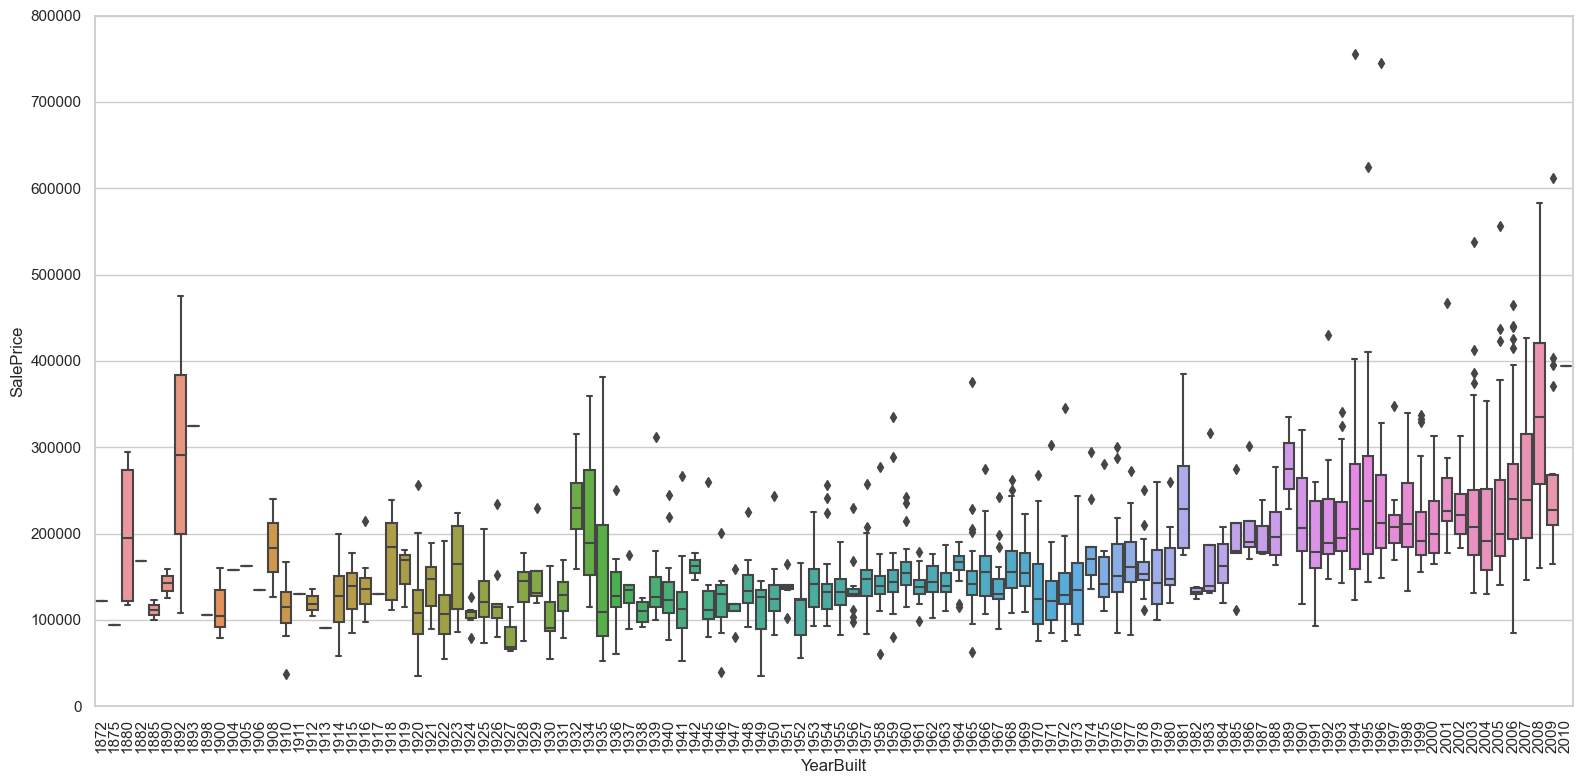

In [230]:
f, ax = plt.subplots(figsize=(16, 8))
g = sns.boxplot(x = 'YearBuilt', y = 'SalePrice', data =df )
g.axis(ymin = 0, ymax = 800000);
plt.xticks(rotation = 90);
plt.tight_layout()
#f, ax = plt.subplots(figsize=(16, 8))
#fig = sns.boxplot(x="YearBuilt", y="SalePrice", data=df,)
#fig.axis(ymin=0, ymax=900000);
#plt.xticks(rotation=90);
#plt.tight_layout()

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

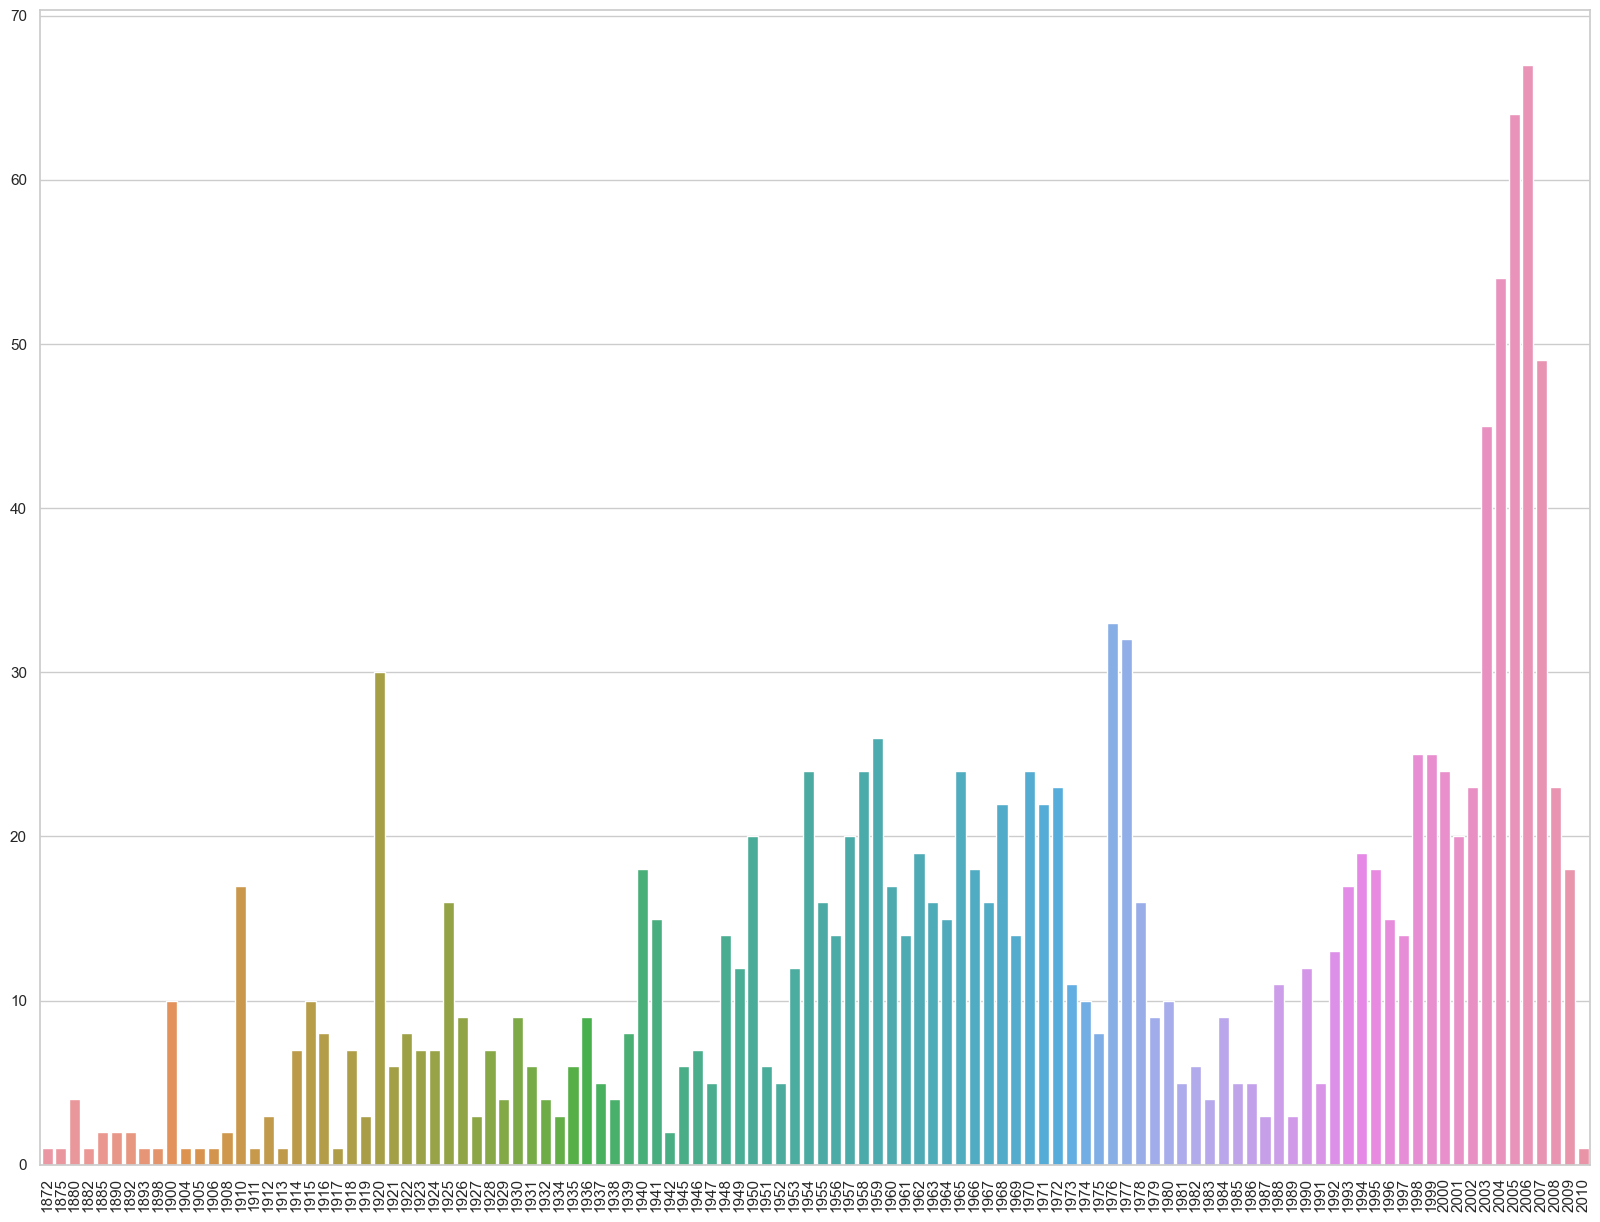

In [231]:
houseperyear = df['YearBuilt'].value_counts()
sns.barplot(x = houseperyear.index, y = houseperyear.values)
plt.xticks(rotation = 90);
plt.tight_layout

Let's check if the month affects the SalePrice

In [232]:
month = df.groupby('MoSold')['SalePrice'].mean().sort_values(ascending = False).reset_index()
month = pd.DataFrame(month)
month

MoSold  SalePrice
0        9 195,683.21
1       11 192,210.91
2       12 186,518.97
3        7 186,331.19
4        8 184,651.83
5        1 183,256.26
6        3 183,253.92
7       10 179,563.98
8        2 177,882.00
9        6 177,395.74
10       5 172,307.27
11       4 171,503.26

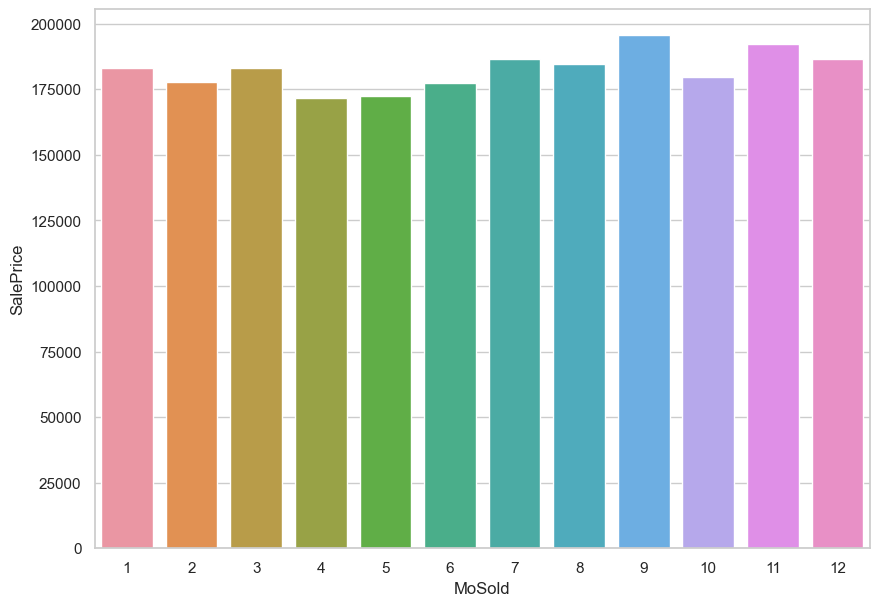

In [233]:
f, ax = plt.subplots(figsize = (10,7))
g = sns.barplot(x = 'MoSold', y = 'SalePrice', data = month)

# EDA

We already sorted our dataset relevant to their datatype (numeric or containing objects)
Let's look at the data a bit closer

In [234]:
#getting numerical features again
dtype_obj = list(column for column in df.select_dtypes([object]))
dtype_obj
print(len(dtype_obj), '\n', dtype_obj)

39 
 ['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition']


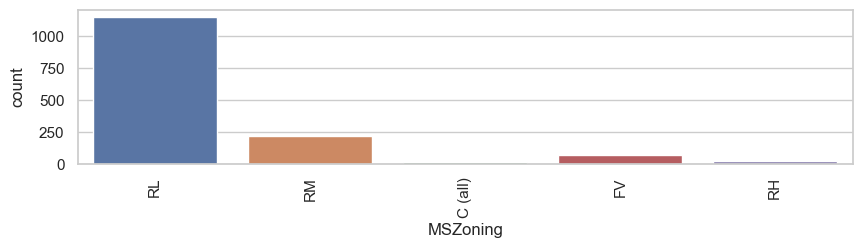

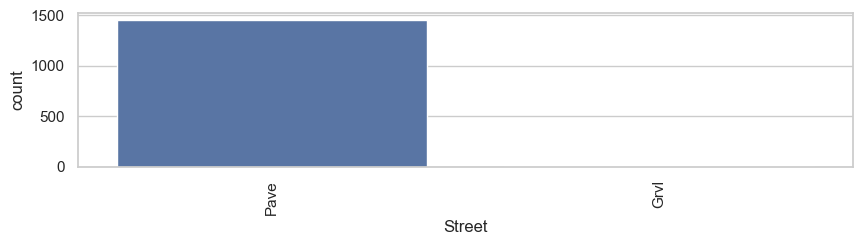

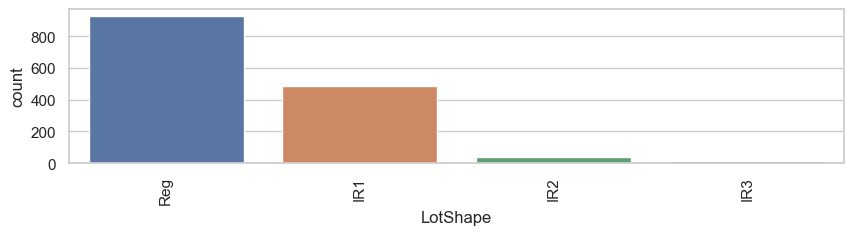

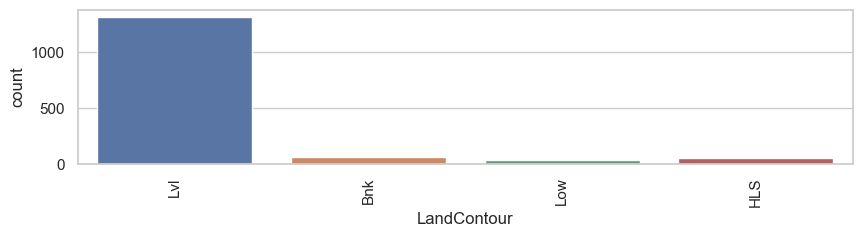

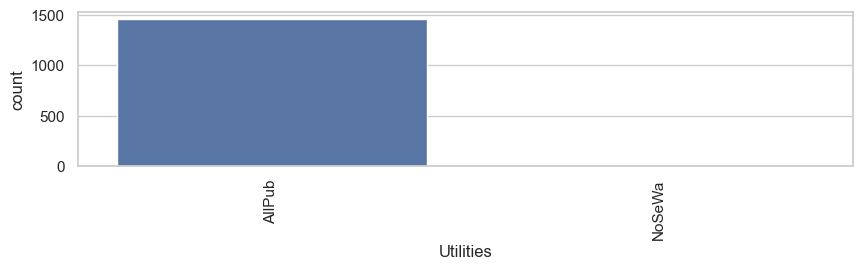

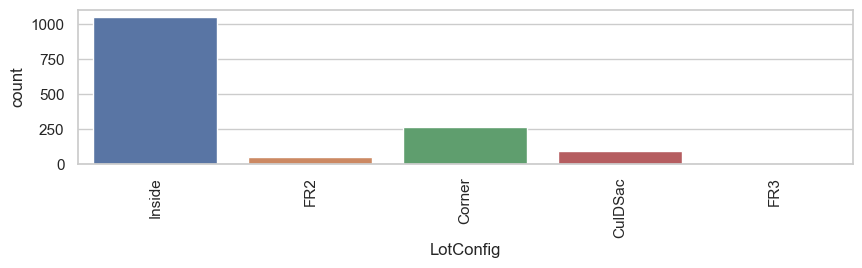

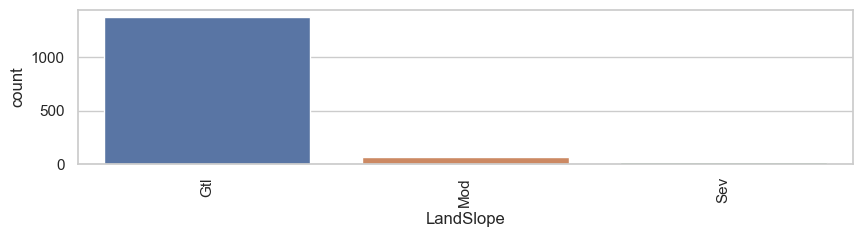

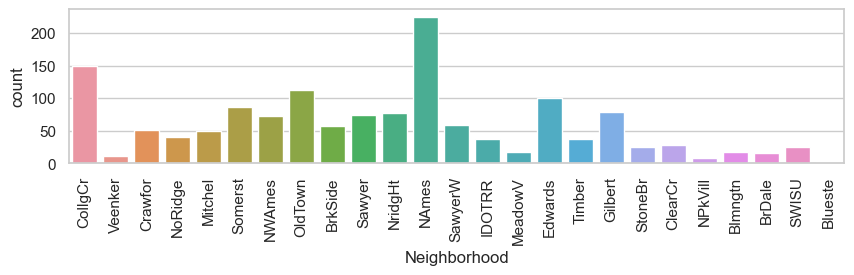

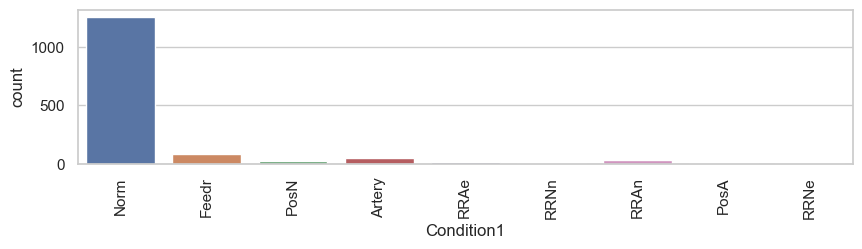

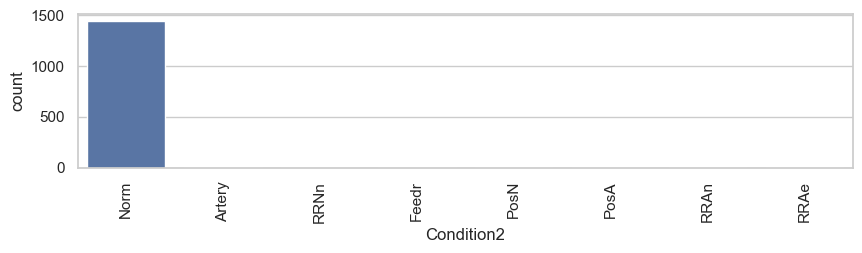

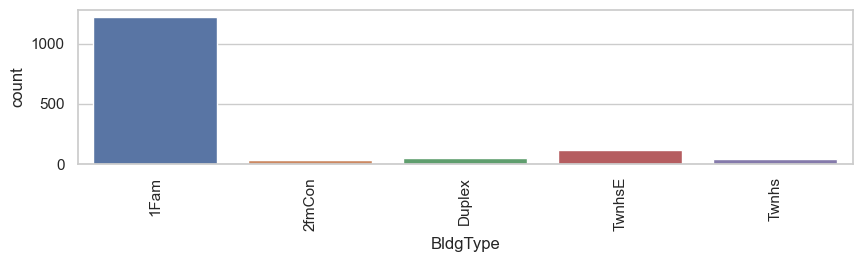

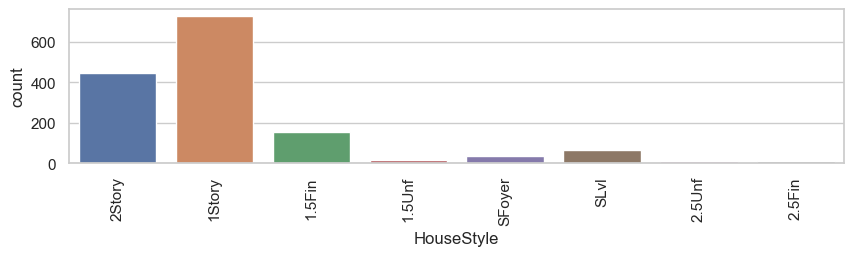

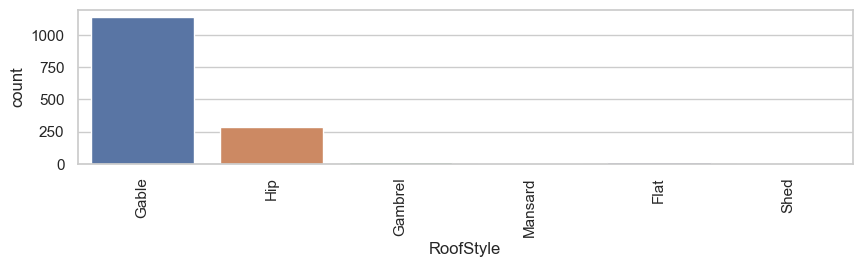

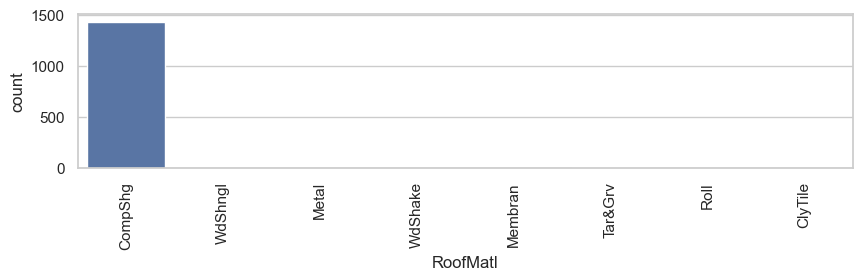

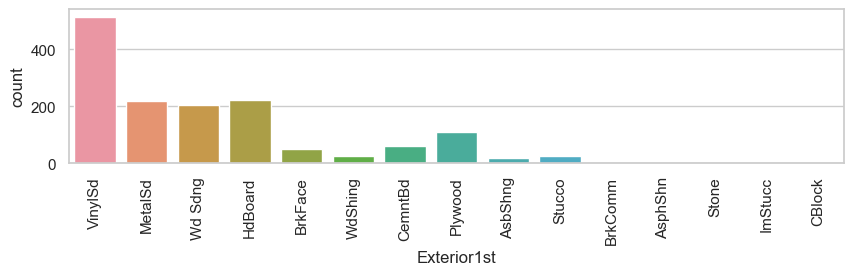

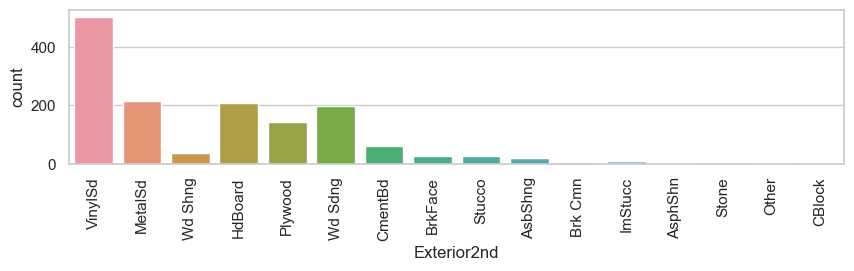

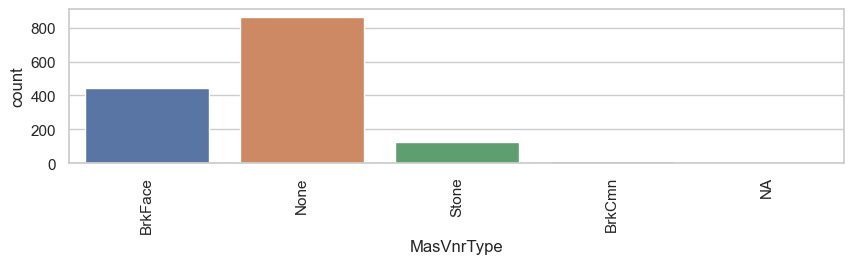

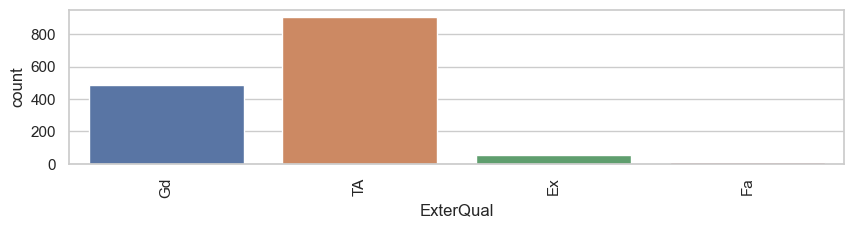

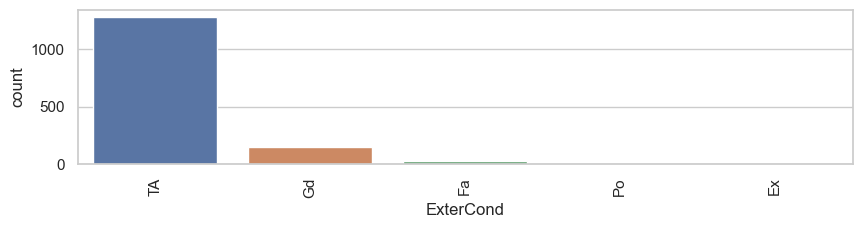

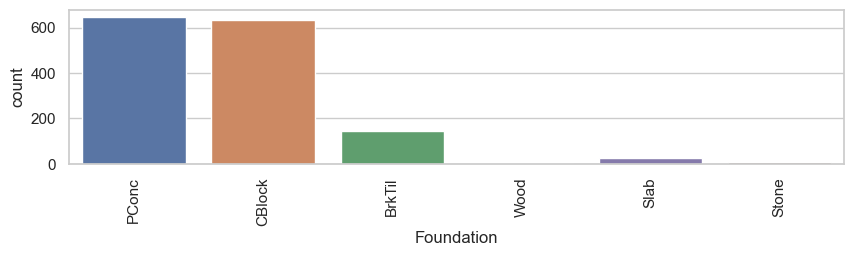

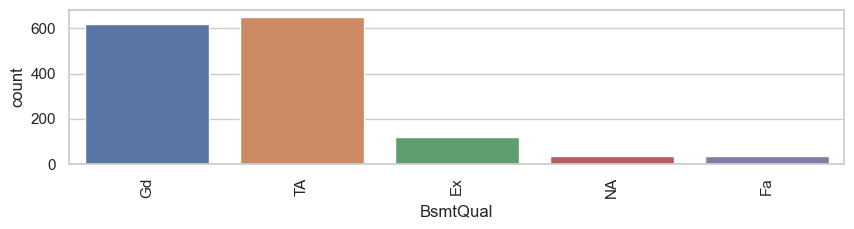

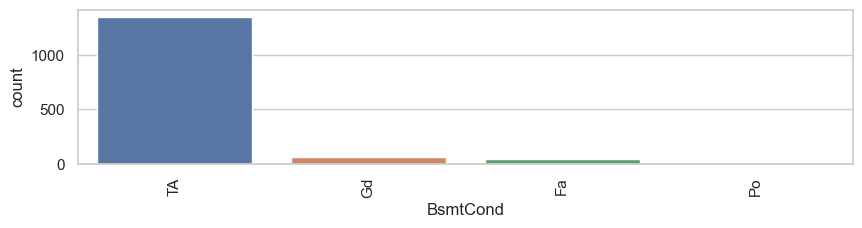

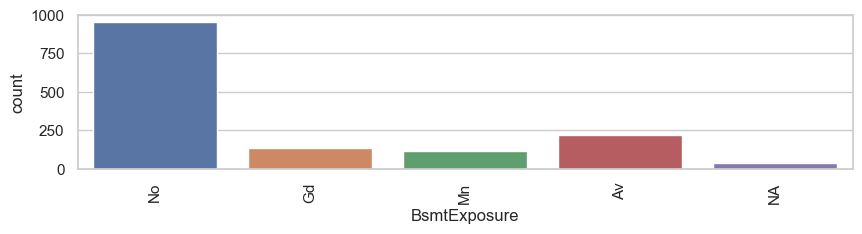

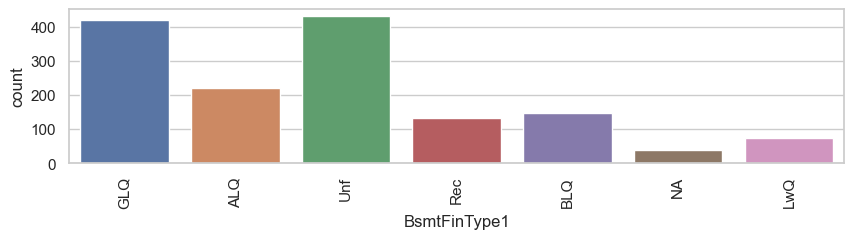

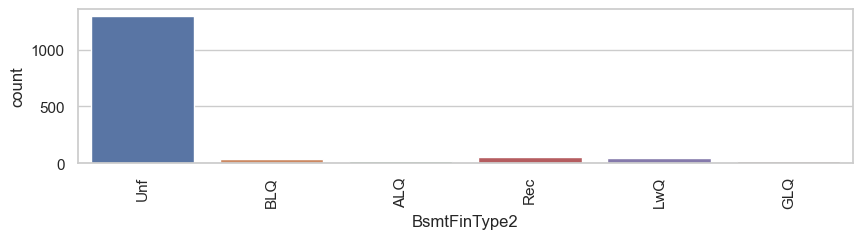

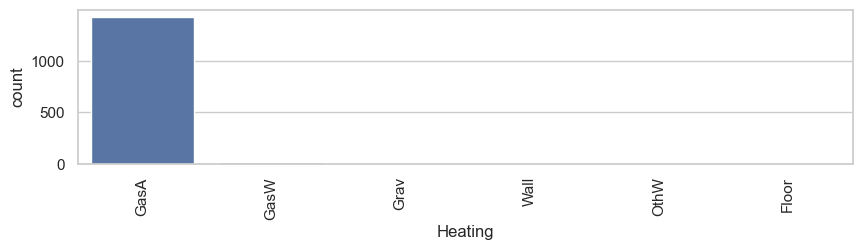

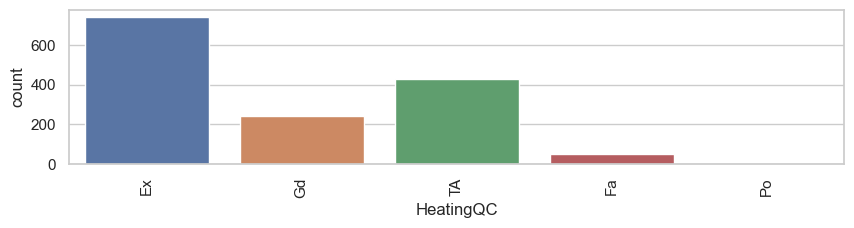

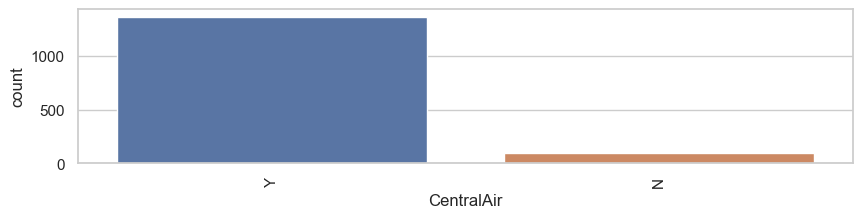

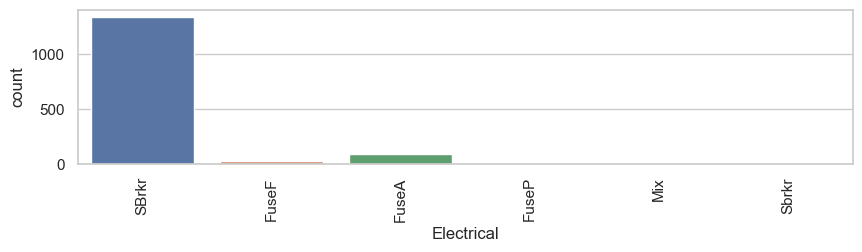

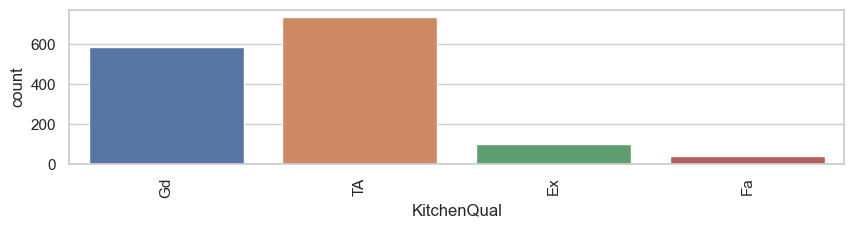

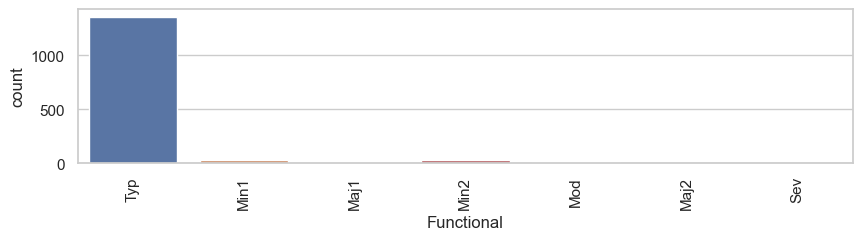

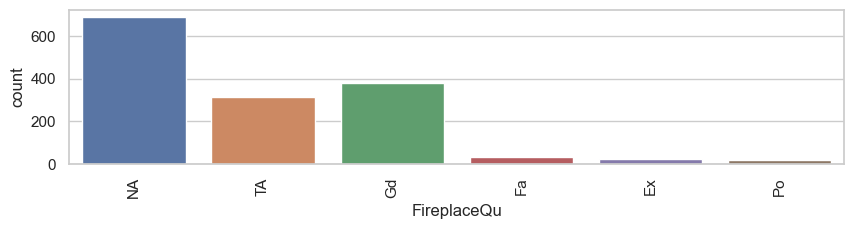

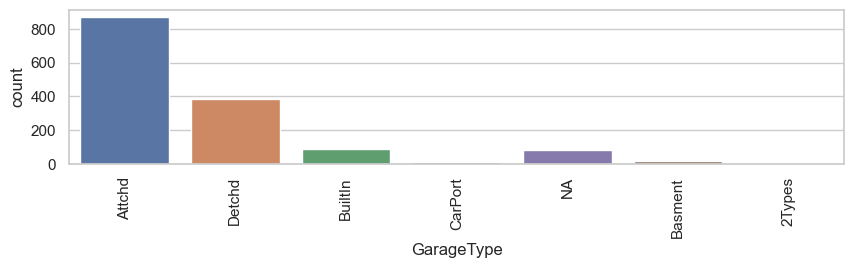

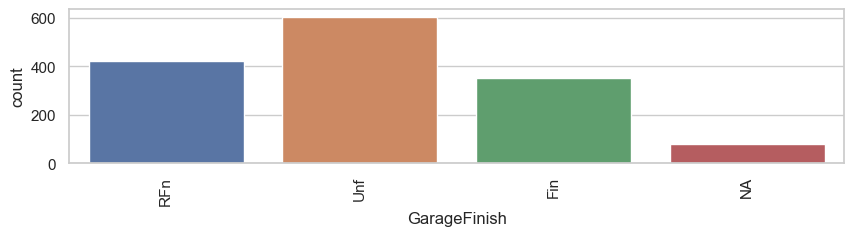

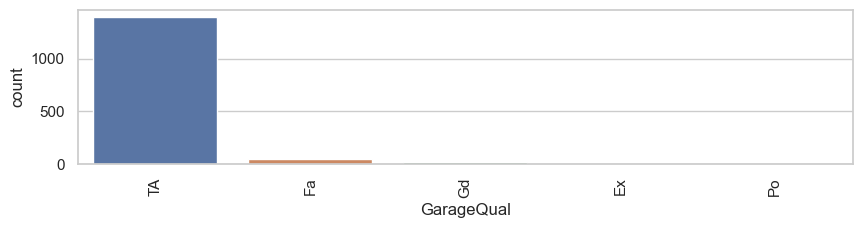

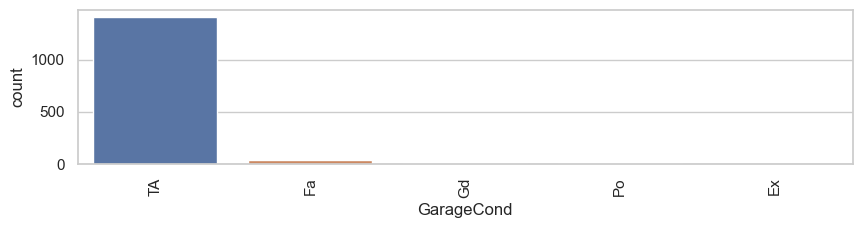

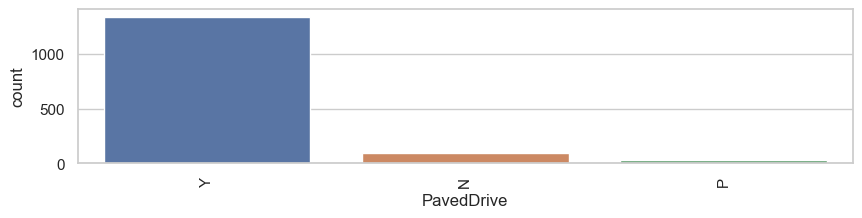

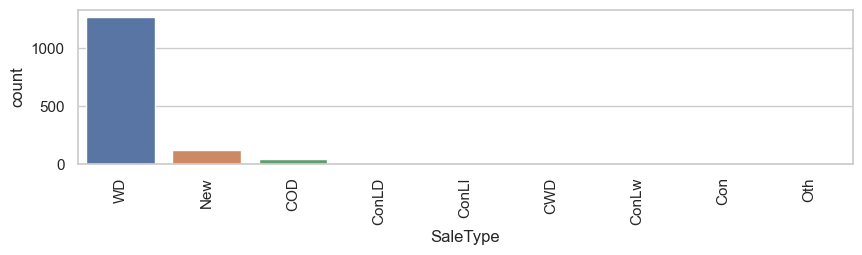

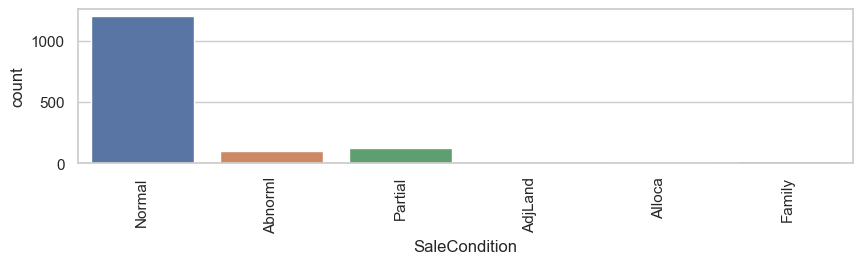

In [235]:
for i in df[dtype_obj]:
    plt.figure(figsize = (10, 2))
    g = sns.countplot(df[i])
    plt.xticks(rotation = 90)
    plt.tight_layout


Let's repeat that fro floats


In [236]:

dtype_float = list(column for column in df.select_dtypes([float]))
print(dtype_float, '\n', 'Number of features: ', len(dtype_float))

['LotFrontage', 'MasVnrArea', 'GarageYrBlt', 'LogSalePrice'] 
 Number of features:  4


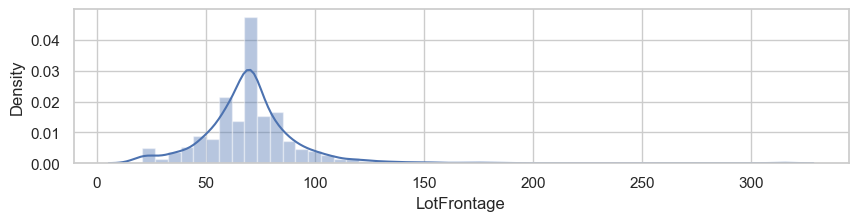

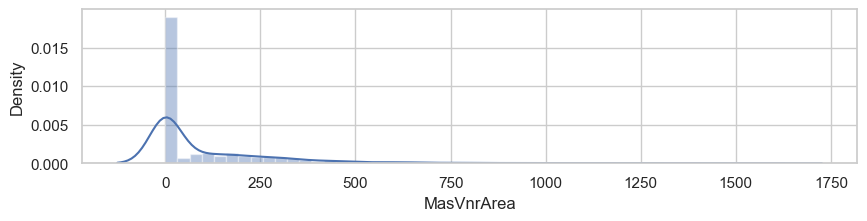

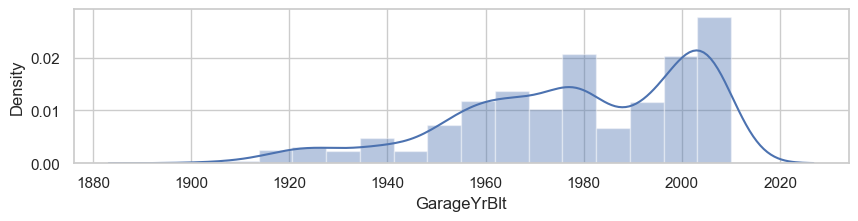

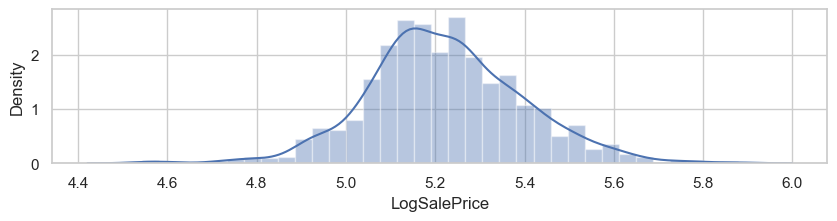

In [237]:
for i in df[dtype_float]:
    plt.figure(figsize = (10,2))
    sns.distplot(df[i])

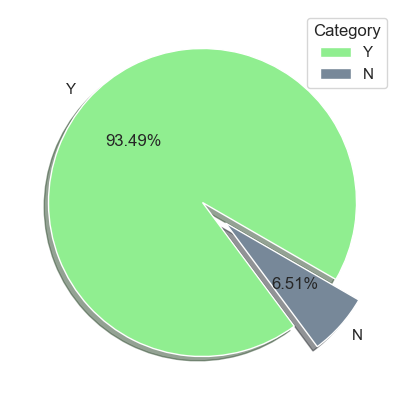

In [238]:
plt.figure(figsize=(5,5))
labels=['Y','N']
size=df['CentralAir'].value_counts()
colors=['lightgreen','lightslategray']
explode=[0,0.2]
plt.pie(size,labels=labels,colors=colors,explode=explode,autopct='%.2f%%',shadow = True,startangle = -30,
wedgeprops= {'edgecolor':'white','linewidth':1})
plt.legend(labels,loc="upper right",title='Category') ## used to label at the side
plt.show()

Text(0.5, 1.0, 'Bedrooms above garage level vs Central Air')

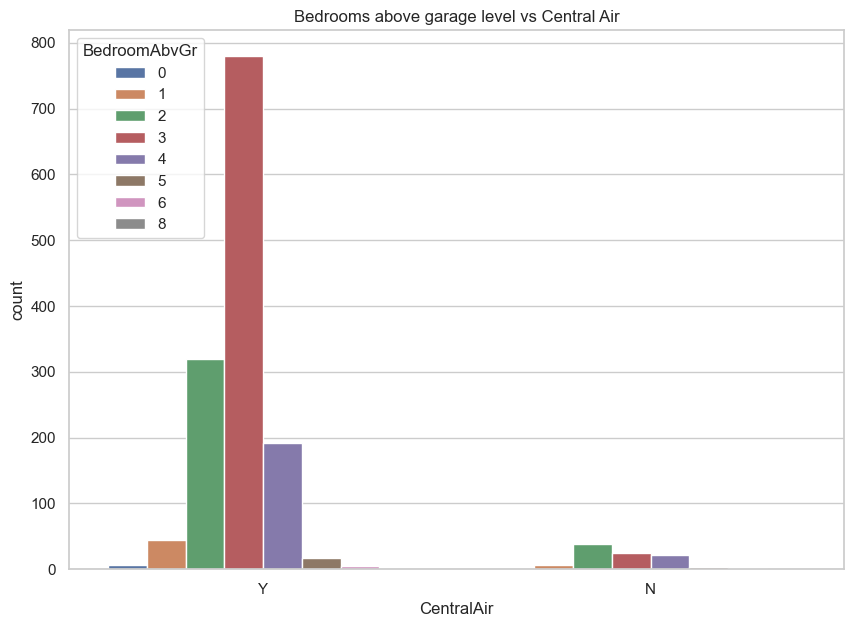

In [239]:
plt.figure(figsize = (10,7))
sns.countplot(x = 'CentralAir', data = df, hue = 'BedroomAbvGr').set_title('Bedrooms above garage level vs Central Air')

Seems like houses with 3 bedrooms or more have Central Air Codnitioning more often


In [240]:
df.columns.sort_values(ascending = True)

Index(['1stFlrSF', '2ndFlrSF', '3SsnPorch', 'BedroomAbvGr', 'BldgType',
       'BsmtCond', 'BsmtExposure', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtFinType1',
       'BsmtFinType2', 'BsmtFullBath', 'BsmtHalfBath', 'BsmtQual', 'BsmtUnfSF',
       'CentralAir', 'Condition1', 'Condition2', 'Electrical', 'EnclosedPorch',
       'ExterCond', 'ExterQual', 'Exterior1st', 'Exterior2nd', 'FireplaceQu',
       'Fireplaces', 'Foundation', 'FullBath', 'Functional', 'GarageArea',
       'GarageCars', 'GarageCond', 'GarageFinish', 'GarageQual', 'GarageType',
       'GarageYrBlt', 'GrLivArea', 'HalfBath', 'Heating', 'HeatingQC',
       'HouseStyle', 'Id', 'KitchenAbvGr', 'KitchenQual', 'LandContour',
       'LandSlope', 'LogSalePrice', 'LotArea', 'LotConfig', 'LotFrontage',
       'LotShape', 'LowQualFinSF', 'MSSubClass', 'MSZoning', 'MasVnrArea',
       'MasVnrType', 'MiscVal', 'MoSold', 'Neighborhood', 'OpenPorchSF',
       'OverallCond', 'OverallQual', 'PavedDrive', 'PoolArea', 'RoofMatl',
       'RoofSty

### Let's look if there is any correlation between the size of garages and year they were built

<AxesSubplot:xlabel='GarageYrBlt', ylabel='GarageArea'>

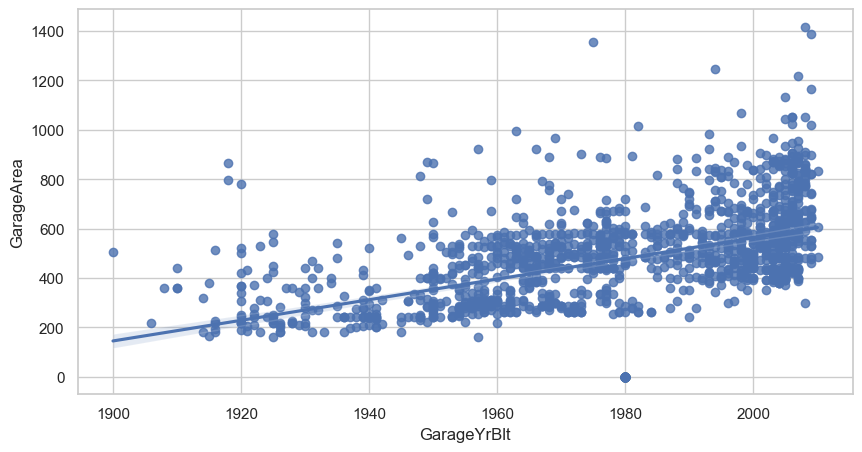

In [241]:
plt.figure(figsize = (10,5))
sns.regplot(x = 'GarageYrBlt', y = 'GarageArea', data = df)

The newer the garage, the more is the likelyhood that it will be bigger.
After building regplot, we can observe a lot of outliers


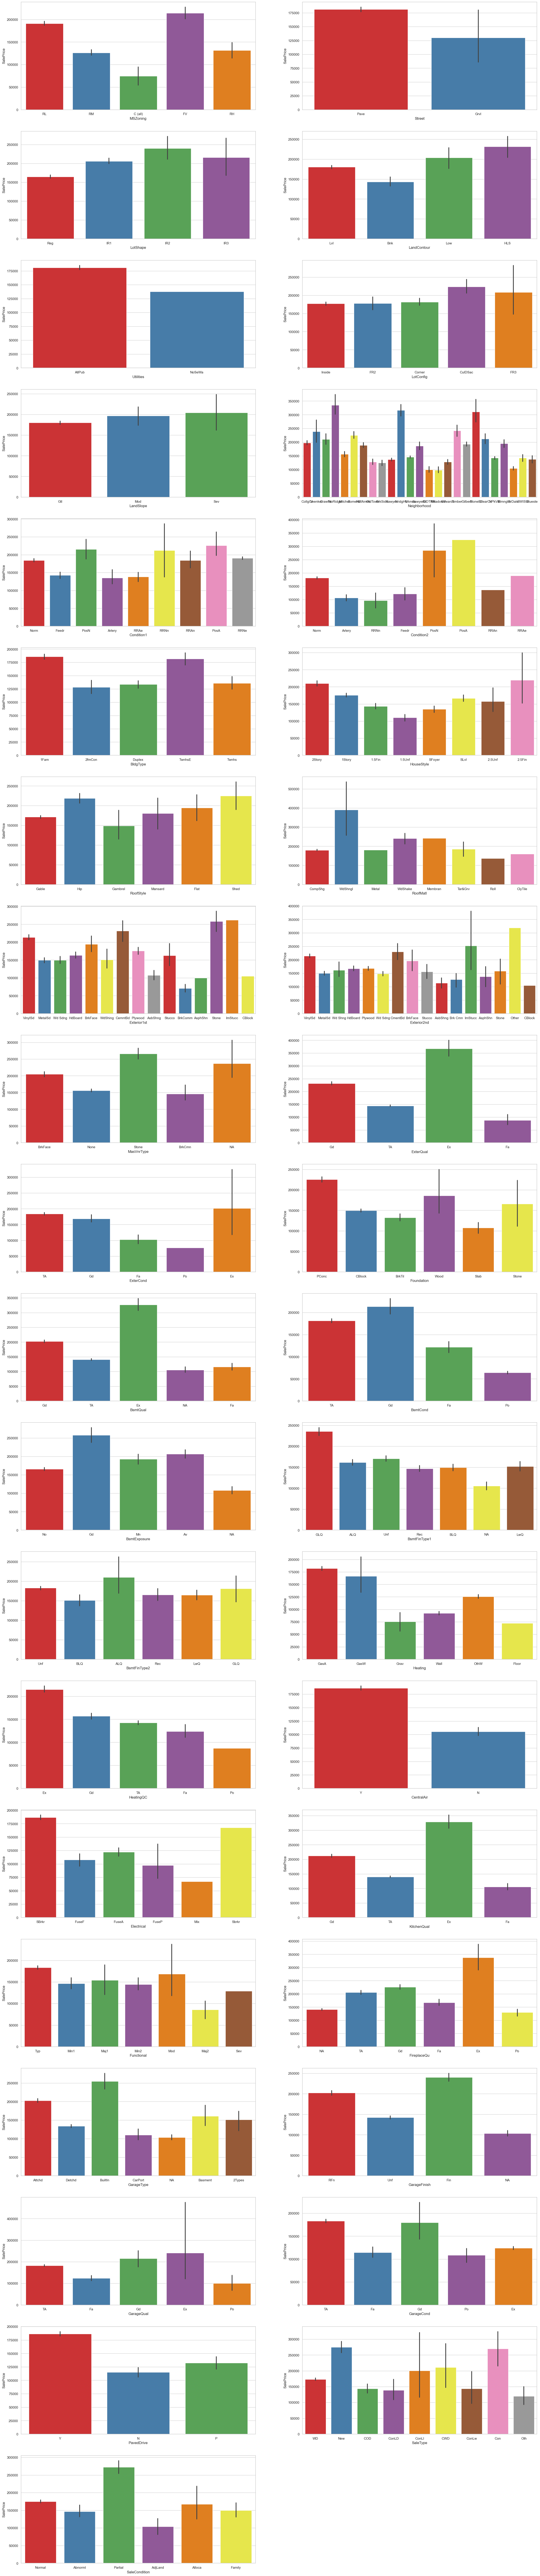

In [242]:
plt.figure(figsize=(30,150))
plotnumber = 1
for c in dtype_obj:
    ax = plt.subplot(20,2,plotnumber)
    sns.barplot(x= df[c], y = 'SalePrice', data = df, palette ='Set1')
    plotnumber+=1

### Let's look for outliers in continuous data

In [243]:
df.corr()['SalePrice'].sort_values(ascending = False)[2:10]

OverallQual    0.79
GrLivArea      0.71
GarageCars     0.64
GarageArea     0.62
TotalBsmtSF    0.61
1stFlrSF       0.61
FullBath       0.56
TotRmsAbvGrd   0.53
Name: SalePrice, dtype: float64

In [244]:
box = df.corr()['SalePrice'].sort_values(ascending = False)[2:10].index.to_list()
box

['OverallQual',
 'GrLivArea',
 'GarageCars',
 'GarageArea',
 'TotalBsmtSF',
 '1stFlrSF',
 'FullBath',
 'TotRmsAbvGrd']

<Figure size 200x200 with 0 Axes>

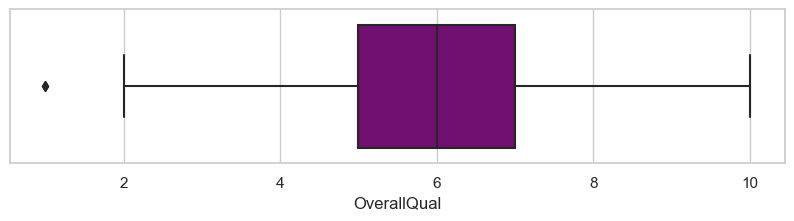

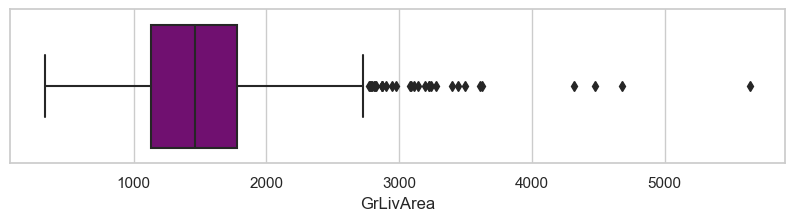

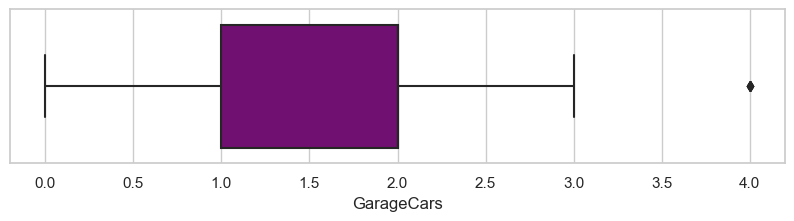

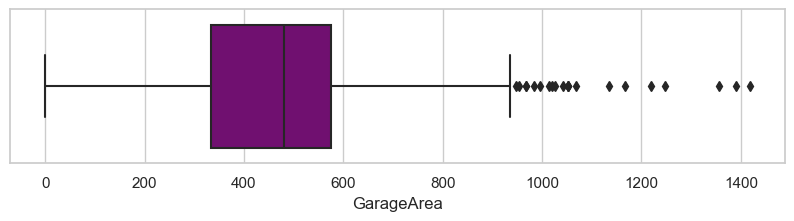

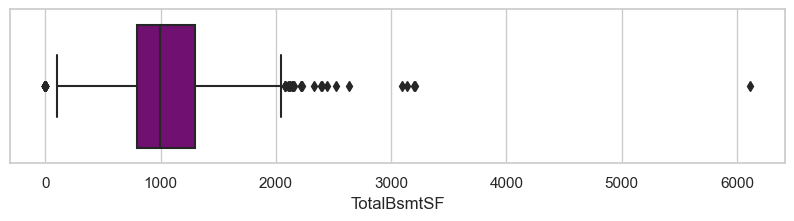

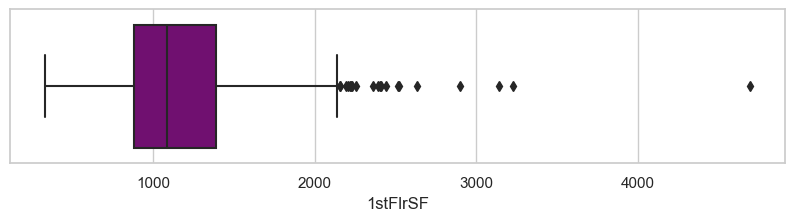

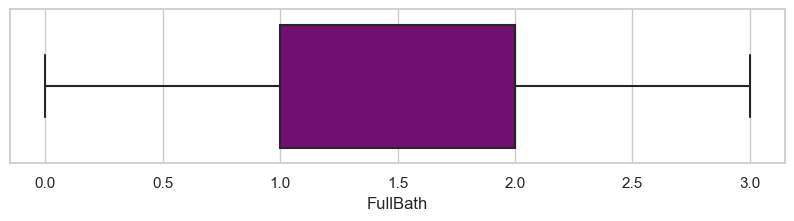

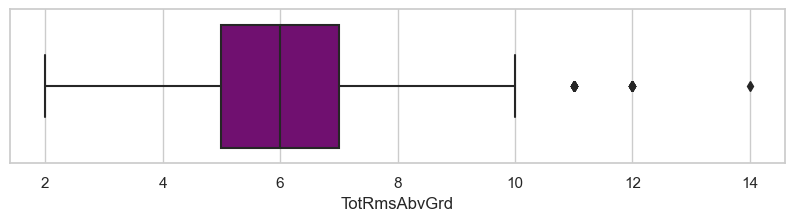

In [245]:
plt.figure(figsize=(2,2),facecolor='white')
for c in box:
    plt.figure(figsize=(10,2),facecolor='white')
    sns.boxplot(df[c],color='purple')
    plt.show()


In [246]:
df.columns


Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodD

# Model creation


In [247]:
from sklearn.model_selection import train_test_split

cat_feat

['MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'SaleType',
 'SaleCondition']

In [248]:
df_dumm = pd.get_dummies(df, columns=[cat_feat])

KeyError: "None of [Index([('MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition')], dtype='object')] are in the [columns]"

In [ ]:
df